In [464]:
%load_ext autoreload
%autoreload

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [465]:
#check out plot_model
#check out model.evaluate

In [466]:
from pathlib import Path
import pandas as pd
from pmdarima.arima import auto_arima



IBBmonth = Path.cwd() / "data" / "Raw" / "IBBmonth.csv"
IBB = Path.cwd() / "data" / "Raw" / "IBB.csv"
ARKF = Path.cwd() / "data" / "Raw" / "ARKF.csv"
ARKK = Path.cwd() / "data" / "Raw" / "ARKK.csv"


data_t = pd.read_csv(ARKK, usecols=[0,4], parse_dates=[0], header=0)

In [467]:
from Models.ARIMA import *
from Models.Helper import *
from Data.Raw import *
from Models.MLP import *

In [468]:
n_diffs = find_differencing(data_t['Close'].values)

Estimated differencing term: 2


In [469]:
data_t.head()

Date      Close
0 2016-01-04  20.010000
1 2016-01-05  20.170000
2 2016-01-06  19.830000
3 2016-01-07  19.049999
4 2016-01-08  18.830000

In [470]:
#Split dataset

def split_data(data, training_size):
    if training_size < 0 or training_size > 1:
        raise ValueError("Please use a value between 0 and 1 to split the dataset. Recommended values for the size of the training dataset are: 0.50, 0.67, 0.80.")
    train_data, test_data = data[0:int(len(data)*training_size)], data[int(len(data)*training_size):]
    
    train_data = train_data['Close'].values
    test_data = test_data['Close'].values
    
    print("Number of training samples:", len(train_data))
    print("Number of testing samples:", len(test_data))
    return training_size, train_data, test_data
    
    
split_ratio, train_data, test_data = split_data(data_t, 0.67)

Number of training samples: 843
Number of testing samples: 416


In [471]:
#arima_model_order =  auto_arima(train_data,start_p=0, d=n_diffs, start_q=0, 
#                          max_p=5, max_d=5, max_q=5, start_P=0, 
#                          D=0, start_Q=0, max_P=5, max_D=5,
#                          max_Q=5, seasonal_test='ocsb', error_action='warn',trace = True,
#                          supress_warnings=True,stepwise = True,
#                          random_state=None, n_fits = 50)
#
#
#print(arima_model_order)
#print(arima_model_order.order)

In [472]:
#model_predictions = stepwise_ARIMA(train_data, test_data, arima_model_order.order)

In [473]:
#test_set_range = data_t[int(len(data_t)*split_ratio):].index
#plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
#plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
#plt.plot(test_set_range, test_data, color='red', label='Actual Price')
#plt.title('Price Prediction')
#plt.xlabel('Date')
#plt.ylabel('Price')
#plt.legend()
#plt.show()


In [474]:
#print("Error measures for ARIMA:")
#calculate_error_measures(test_data, model_predictions)

In [475]:
#score = r2_score(test_data, model_predictions)
#print('R-squared score for the test set:', round(score,4))

In [476]:
input_dim = find_input_dim(data_t['Close'])

Number of values above 0.9 autocorrelation is:  15


In [477]:
data_close = pd.DataFrame(data_t['Close'])
data_close.index = pd.to_datetime(data_t['Date'])

list_of_attributes = ['Close']

list_of_prev_t_instants = []
for i in range(1, input_dim+1):
    list_of_prev_t_instants.append(i)

df_new = create_regressor_attributes(data_close, list_of_attributes, list_of_prev_t_instants)

df_new.shape

(1244, 16)

In [478]:
df_new.head()

Close  Close_(t-1)  Close_(t-2)  Close_(t-3)  Close_(t-4)  \
datetime                                                                    
2016-01-26  17.049999    17.320000    17.530001    17.200001    17.049999   
2016-01-27  16.877001    17.049999    17.320000    17.530001    17.200001   
2016-01-28  16.480000    16.877001    17.049999    17.320000    17.530001   
2016-01-29  16.740000    16.480000    16.877001    17.049999    17.320000   
2016-02-01  16.875000    16.740000    16.480000    16.877001    17.049999   

            Close_(t-5)  Close_(t-6)  Close_(t-7)  Close_(t-8)  Close_(t-9)  \
datetime                                                                      
2016-01-26    17.500000    17.320000    18.030001    17.870001    18.434999   
2016-01-27    17.049999    17.500000    17.320000    18.030001    17.870001   
2016-01-28    17.200001    17.049999    17.500000    17.320000    18.030001   
2016-01-29    17.530001    17.200001    17.049999    17.500000    17.320000   
2016-02-01    17.320000    17.530001    17.200001    17.049999    17.500000   

            Close_(t-10)  Close_(t-11)  Close_(t-12)  Close_(t-13)  \
datetime                                                             
2016-01-26     18.170000     18.830000     19.049999     19.830000   
2016-01-27     18.434999     18.170000     18.830000     19.049999   
2016-01-28     17.870001     18.434999     18.170000     18.830000   
2016-01-29     18.030001     17.870001     18.434999     18.170000   
2016-02-01     17.320000     18.030001     17.870001     18.434999   

            Close_(t-14)  Close_(t-15)  
datetime                                
2016-01-26     20.170000     20.010000  
2016-01-27     19.830000     20.170000  
2016-01-28     19.049999     19.830000  
2016-01-29     18.830000     19.049999  
2016-02-01     18.170000     18.830000

In [479]:
mlp_model = build_MLP_model(input_dim)

Model: "sequential_478"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1223 (Dense)           (None, 15)                240       
_________________________________________________________________
dense_1224 (Dense)           (None, 15)                240       
_________________________________________________________________
dense_1225 (Dense)           (None, 1)                 16        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [480]:
from tensorflow.keras.utils import plot_model

plot_model(mlp_model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [481]:
X_train, y_train, X_valid, y_valid, X_test, y_test = create_train_valid_test(df_new, 0.05, 0.05)

Shape of training inputs, training target: (1121, 15) (1121,)
Shape of validation inputs, validation target: (60, 15) (60,)
Shape of test inputs, test target: (63, 15) (63,)


In [482]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_scaled = scale_data(X_train, y_train, X_valid, y_valid, X_test, y_test, scaler)



In [483]:

y_test_rescaled = Target_scaler.inverse_transform(y_test_scaled)


[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 1.5703 - val_loss: 1.9821
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 1.3353 - val_loss: 1.6540
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 1.0699 - val_loss: 1.3271
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8176 - val_loss: 1.0246
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6119 - val_loss: 0.7632
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4442 - val_loss: 0.5562
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3150 - val_loss: 0.3974
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2173 - val_loss: 0.2797
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1481 - val_loss: 0.1935
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0982 - val_loss: 0.1338
E

9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0238
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0238
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0238
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0237
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0237
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0237
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0237
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0237
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0237
Epoch 93/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0237
Epoch 94/100
9/9 [=========

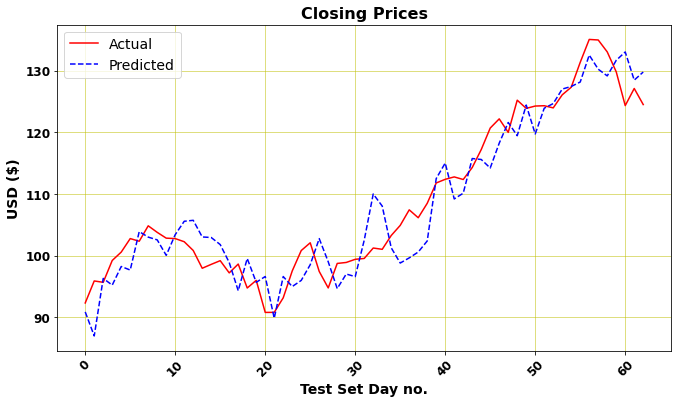

Mean Squared Error: 16.705475102131732
Mean Absolute Error: 3.433847787039621
R-squared score: 0.8964
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.9273 - val_loss: 1.2159
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7043 - val_loss: 0.9196
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.5162 - val_loss: 0.6787
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3647 - val_loss: 0.4900
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2514 - val_loss: 0.3455
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1662 - val_loss: 0.2406
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1064 - val_loss: 0.1676
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0660 - val_loss: 0.1190
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0411 - val_loss

9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0352
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0351
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0351
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0350
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0012 - val_loss: 0.0350
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0350
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0349
Epoch 89/100
9/9 [==============================] - 0s 889us/step - loss: 0.0012 - val_loss: 0.0349
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0349
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0012 - val_loss: 0.0348
Epoch 92/100
9/

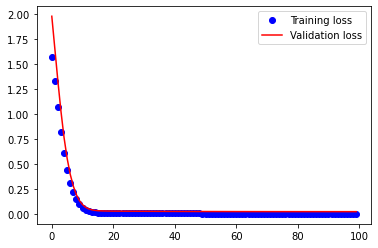

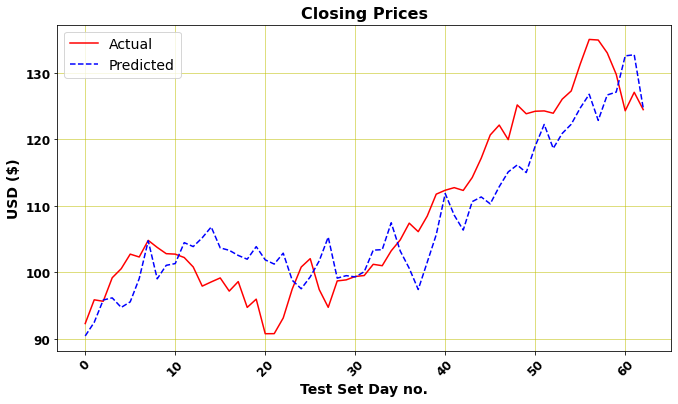

Mean Squared Error: 34.62261132623181
Mean Absolute Error: 4.962393292798239
R-squared score: 0.7852
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0524 - val_loss: 0.1134
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0292 - val_loss: 0.0802
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0588
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0062 - val_loss: 0.0472
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0038 - val_loss: 0.0418
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0400
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0033 - val_loss: 0.0397
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0401
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss:

9/9 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0339
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0018 - val_loss: 0.0338
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0018 - val_loss: 0.0338
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0337
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0337
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0337
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0333
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0017 - val_loss: 0.0333
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 0.0017 - val_loss: 0.0333
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0333
Epoch 92/100
9/9 [====

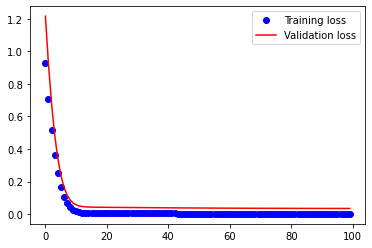

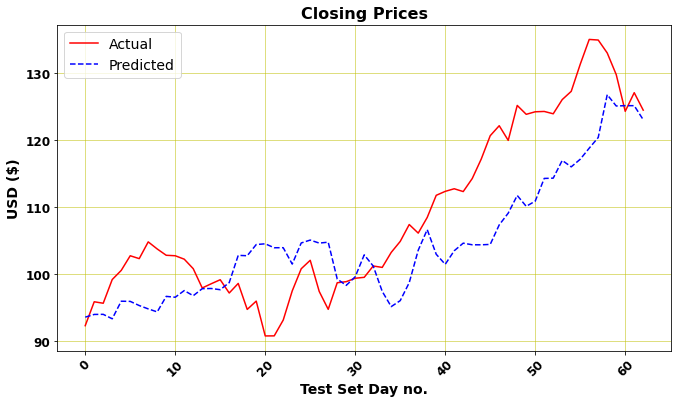

Mean Squared Error: 70.46650495590912
Mean Absolute Error: 6.982404882556735
R-squared score: 0.5628
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0062 - val_loss: 0.0747
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0734
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0025 - val_loss: 0.0737
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0021 - val_loss: 0.0748
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0021 - val_loss: 0.0735
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0731
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0019 - val_loss: 0.0733
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0019 - val_loss: 0.0732
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0019 - val

9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0588
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0585
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0586
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0581
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0582
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0579
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0578
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0574
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0575
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0573
Epoch 92/100
9/9 [============

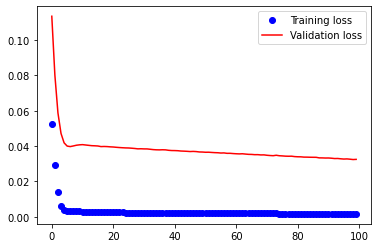

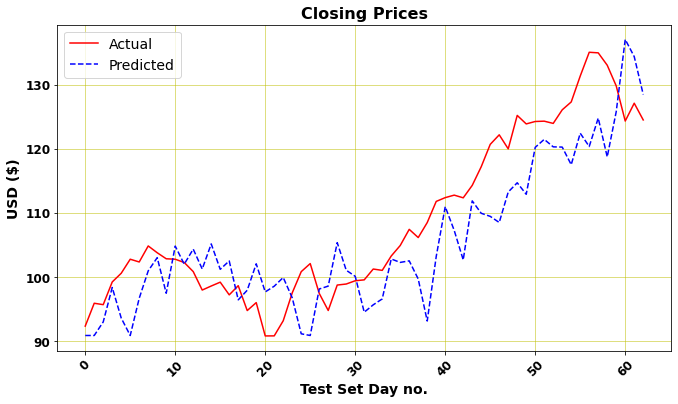

Mean Squared Error: 49.93688038557591
Mean Absolute Error: 5.892240616675966
R-squared score: 0.6902
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 1.0792 - val_loss: 1.7042
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.9571 - val_loss: 1.5241
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8453 - val_loss: 1.3626
Epoch 4/100
9/9 [==============================] - 0s 889us/step - loss: 0.7444 - val_loss: 1.2188
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6571 - val_loss: 1.0893
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.5784 - val_loss: 0.9746
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5091 - val_loss: 0.8729
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.4477 - val_loss: 0.7832
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3950 - val_los

9/9 [==============================] - 0s 1ms/step - loss: 0.0389 - val_loss: 0.1001
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0996
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0387 - val_loss: 0.0991
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0386 - val_loss: 0.0986
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0385 - val_loss: 0.0982
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0384 - val_loss: 0.0977
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0384 - val_loss: 0.0973
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0383 - val_loss: 0.0969
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 0.0382 - val_loss: 0.0965
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0382 - val_loss: 0.0961
Epoch 92/100
9/9 [=

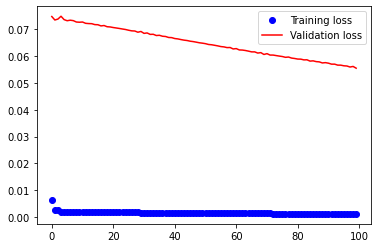

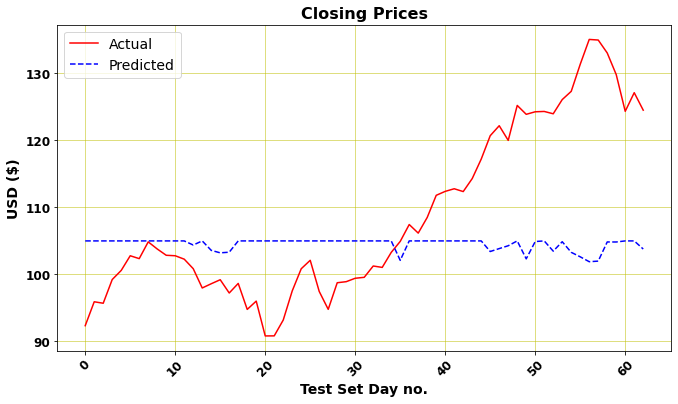

Mean Squared Error: 188.78074131870972
Mean Absolute Error: 10.787603930950832
R-squared score: -0.1712
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2709 - val_loss: 0.4974
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1870 - val_loss: 0.3968
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1423 - val_loss: 0.3404
Epoch 4/100
9/9 [==============================] - 0s 889us/step - loss: 0.1333 - val_loss: 0.3124
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1282 - val_loss: 0.2965
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1235 - val_loss: 0.2855
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1189 - val_loss: 0.2765
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1145 - val_loss: 0.2683
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1103 - val_

9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0865
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0863
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0861
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0859
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0857
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0856
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0854
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0853
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0851
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0849
Epoch 92/100
9/9 [=======

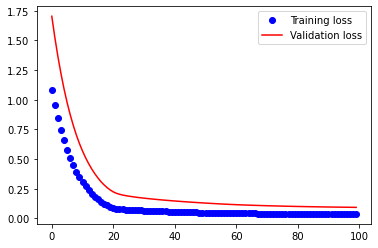

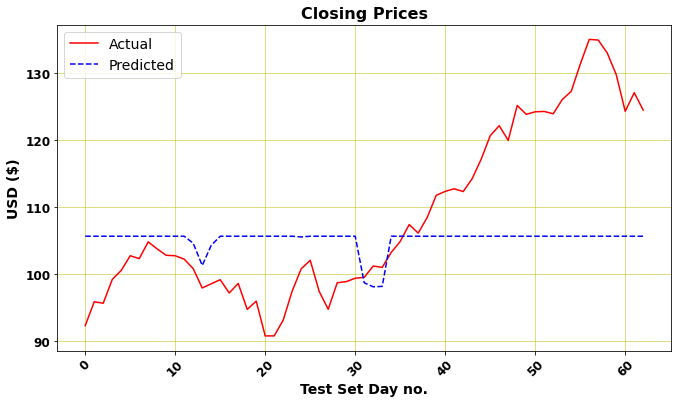

Mean Squared Error: 167.70925551965396
Mean Absolute Error: 10.376263901413692
R-squared score: -0.0405
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4837 - val_loss: 0.5587
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3434 - val_loss: 0.3835
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2104 - val_loss: 0.2469
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1144 - val_loss: 0.1539
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0569 - val_loss: 0.0946
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0251 - val_loss: 0.0622
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0452
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0366
Epoch 9/100
9/9 [==============================] - 0s 889us/step - loss: 0.0042 - val_los

Epoch 81/100
9/9 [==============================] - 0s 889us/step - loss: 5.7085e-04 - val_loss: 0.0238
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 5.6780e-04 - val_loss: 0.0237
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 5.6501e-04 - val_loss: 0.0237
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 5.6249e-04 - val_loss: 0.0237
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5981e-04 - val_loss: 0.0237
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5747e-04 - val_loss: 0.0237
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 5.5539e-04 - val_loss: 0.0237
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 5.5346e-04 - val_loss: 0.0237
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5125e-04 - val_loss: 0.0237
Epoch 90/100
9/9 [==============================] - 0s 1000us/step -

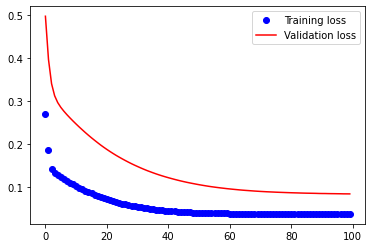

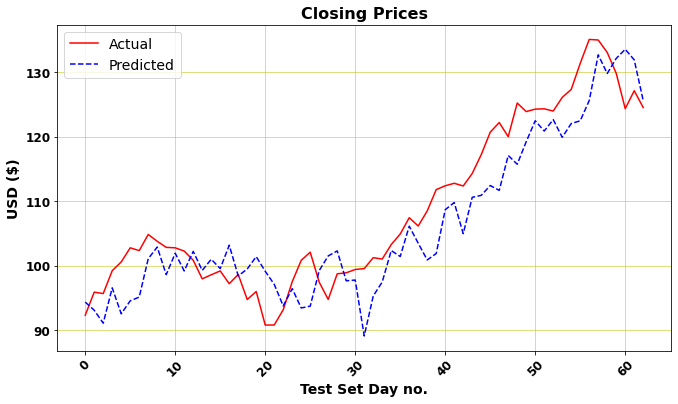

Mean Squared Error: 28.73741541775832
Mean Absolute Error: 4.479418186352926
R-squared score: 0.8217
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3768 - val_loss: 0.4597
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2444 - val_loss: 0.3037
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1449 - val_loss: 0.1904
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0775 - val_loss: 0.1184
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0385 - val_loss: 0.0765
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0175 - val_loss: 0.0552
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0085 - val_loss: 0.0454
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0413
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss:

9/9 [==============================] - 0s 889us/step - loss: 0.0014 - val_loss: 0.0258
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0014 - val_loss: 0.0257
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0256
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 0.0014 - val_loss: 0.0256
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0014 - val_loss: 0.0256
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 0.0014 - val_loss: 0.0255
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0255
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0254
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0254
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0014 - val_loss: 0.0253
Epoch 92/100
9/9 [=

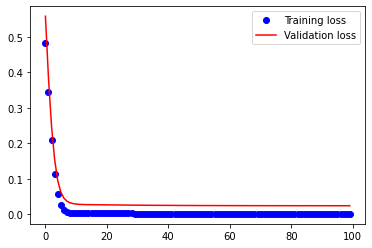

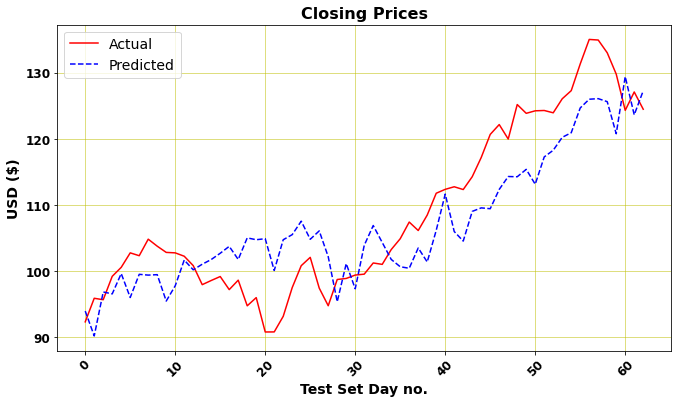

Mean Squared Error: 42.933255372126176
Mean Absolute Error: 5.773008661163815
R-squared score: 0.7336
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0527
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0017 - val_loss: 0.0522
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0016 - val_loss: 0.0518
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0514
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0508
Epoch 6/100
9/9 [==============================] - 0s 889us/step - loss: 0.0015 - val_loss: 0.0503
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0498
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0492
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss:

Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 6.7416e-04 - val_loss: 0.0302
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 6.6660e-04 - val_loss: 0.0300
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 6.6225e-04 - val_loss: 0.0299
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 6.7167e-04 - val_loss: 0.0298
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 6.6802e-04 - val_loss: 0.0298
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 6.5471e-04 - val_loss: 0.0296
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 6.4733e-04 - val_loss: 0.0295
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 6.4063e-04 - val_loss: 0.0294
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 6.3777e-04 - val_loss: 0.0293
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 6.338

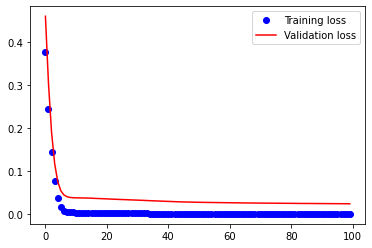

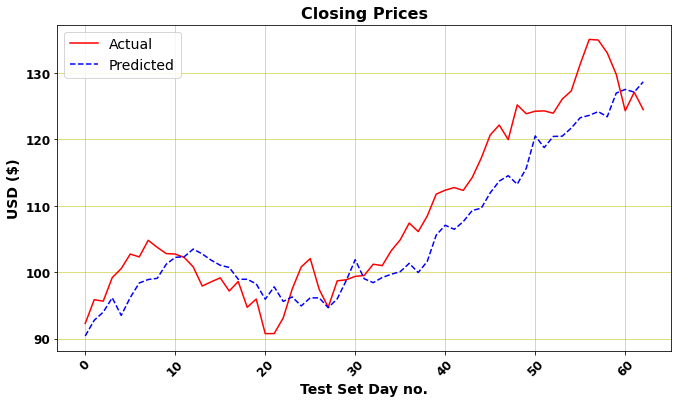

Mean Squared Error: 27.983407715045207
Mean Absolute Error: 4.466923151429191
R-squared score: 0.8264
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1501 - val_loss: 0.2559
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1434 - val_loss: 0.2451
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 0.1376 - val_loss: 0.2362
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1320 - val_loss: 0.2283
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1267 - val_loss: 0.2210
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1216 - val_loss: 0.2140
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.1168 - val_loss: 0.2074
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1121 - val_loss: 0.2012
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1077 - val_loss: 0.1

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0765
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0765
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0764
Epoch 89/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0764
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0762
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0762
Epoch 92/100
9/9 [==========

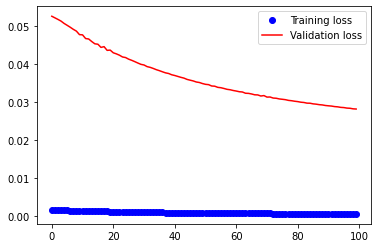

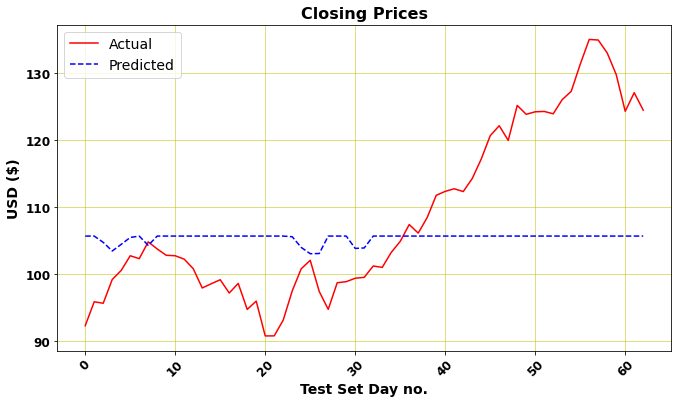

Mean Squared Error: 167.25025066561966
Mean Absolute Error: 10.375560304377483
R-squared score: -0.0377
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2490
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2415
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 0.1374 - val_loss: 0.2341
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2270
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2201
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2135
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2071
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2010
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.1

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0768
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0766
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0765
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0764
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0763
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0763
Epoch 92/100
9/9 [=====

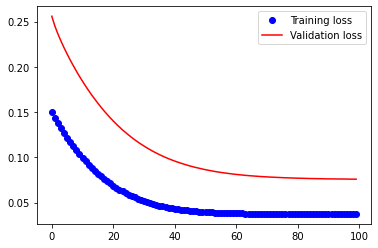

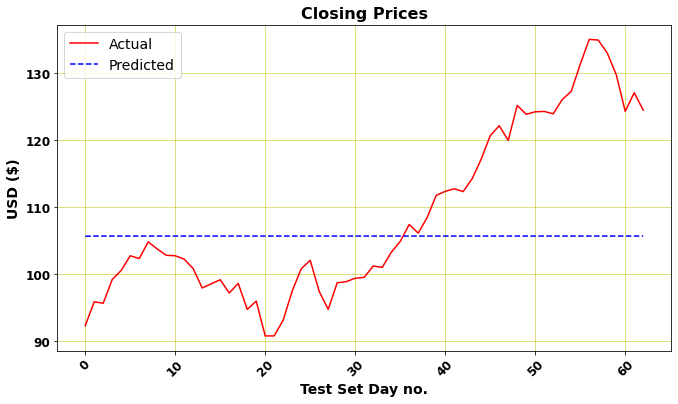

Mean Squared Error: 169.7279940062046
Mean Absolute Error: 10.623009659210691
R-squared score: -0.053
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1384 - val_loss: 0.1663
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0566 - val_loss: 0.1011
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 0.0183 - val_loss: 0.0724
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0604
Epoch 5/100
9/9 [==============================] - 0s 889us/step - loss: 0.0047 - val_loss: 0.0550
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0524
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.0034 - val_loss: 0.0512
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0506
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss

9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0387
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0389
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0386
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0385
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0384
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0383
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0382
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0381
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0379
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0014 - val_loss: 0.0379
Epoch 92/100
9/9 [=============

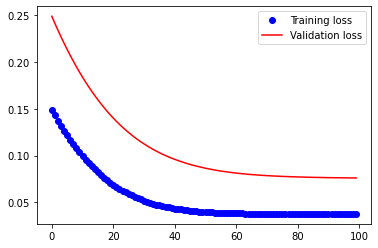

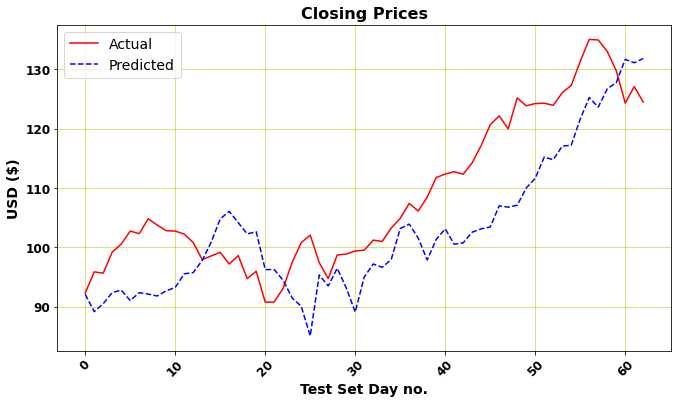

Mean Squared Error: 81.53837617283531
Mean Absolute Error: 7.962548260680182
R-squared score: 0.4941
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0272
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0267
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0270
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0275
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 9.9196e-04 - val_loss: 0.0269
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 9.4811e-04 - val_loss: 0.0268
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 9.3640e-04 - val_loss: 0.0269
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 9.2233e-04 - val_loss: 0.0268
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 9.1392e-0

Epoch 80/100
9/9 [==============================] - 0s 1ms/step - loss: 5.6960e-04 - val_loss: 0.0219
Epoch 81/100
9/9 [==============================] - 0s 1000us/step - loss: 5.6837e-04 - val_loss: 0.0219
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 5.6819e-04 - val_loss: 0.0218
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 5.7397e-04 - val_loss: 0.0218
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 5.8949e-04 - val_loss: 0.0217
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7720e-04 - val_loss: 0.0217
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5975e-04 - val_loss: 0.0216
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5018e-04 - val_loss: 0.0216
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 5.4749e-04 - val_loss: 0.0215
Epoch 89/100
9/9 [==============================] - 0s 889us/step - loss: 

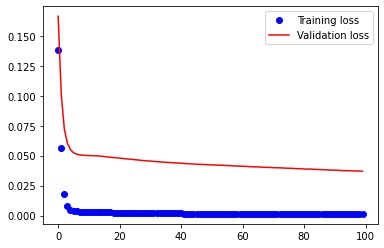

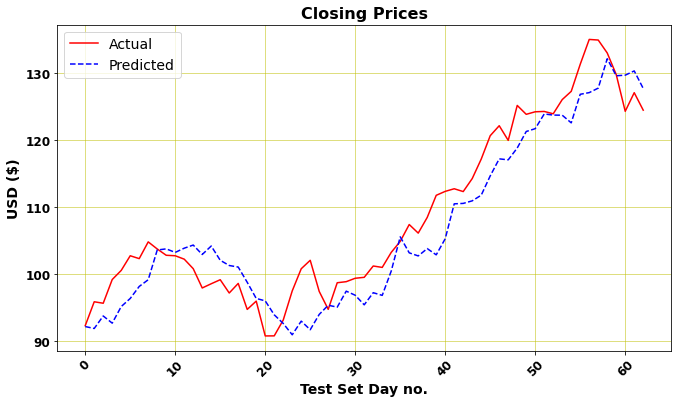

Mean Squared Error: 19.151823934709697
Mean Absolute Error: 3.6946129993102064
R-squared score: 0.8812
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 2.3060 - val_loss: 3.2530
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 1.8086 - val_loss: 2.5656
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 1.3856 - val_loss: 2.0105
Epoch 4/100
9/9 [==============================] - 0s 889us/step - loss: 1.0391 - val_loss: 1.5740
Epoch 5/100
9/9 [==============================] - 0s 889us/step - loss: 0.7731 - val_loss: 1.2491
Epoch 6/100
9/9 [==============================] - 0s 889us/step - loss: 0.5845 - val_loss: 1.0218
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.4823 - val_loss: 0.8680
Epoch 8/100
9/9 [==============================] - 0s 889us/step - loss: 0.4081 - val_loss: 0.7483
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3467 - 

9/9 [==============================] - 0s 1000us/step - loss: 0.0402 - val_loss: 0.1169
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 0.0400 - val_loss: 0.1161
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 0.0399 - val_loss: 0.1153
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0397 - val_loss: 0.1146
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0396 - val_loss: 0.1138
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0394 - val_loss: 0.1131
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0393 - val_loss: 0.1125
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0392 - val_loss: 0.1118
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0391 - val_loss: 0.1111
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0390 - val_loss: 0.1105
Epoch 92/100
9/9 [===

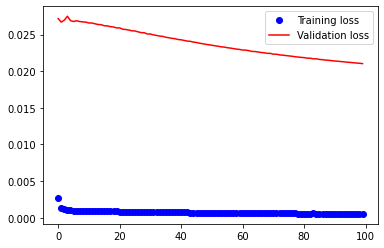

Mean Squared Error: 173.59730099423484
Mean Absolute Error: 10.062672823087176
R-squared score: -0.077
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3569 - val_loss: 0.5506
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2641 - val_loss: 0.4443
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1924 - val_loss: 0.3654
Epoch 4/100
9/9 [==============================] - 0s 889us/step - loss: 0.1483 - val_loss: 0.3143
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1320 - val_loss: 0.2846
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1251 - val_loss: 0.2686
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1203 - val_loss: 0.2583
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1160 - val_loss: 0.2502
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0900
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0898
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0896
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0895
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0893
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0892
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0890
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0888
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0887
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0886
Epoch 93/100
9/9 [==

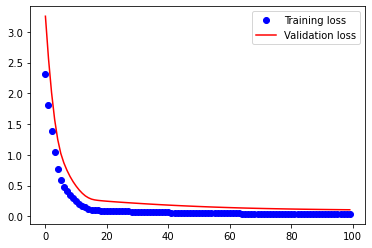

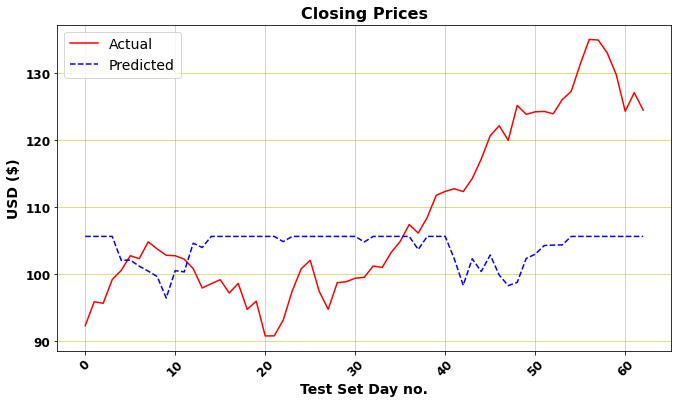

Mean Squared Error: 196.58057079667796
Mean Absolute Error: 11.389323503317216
R-squared score: -0.2196
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 1.3978 - val_loss: 2.2797
Epoch 2/100
9/9 [==============================] - 0s 999us/step - loss: 1.2238 - val_loss: 1.9761
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 1.0661 - val_loss: 1.7310
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.9249 - val_loss: 1.5219
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8030 - val_loss: 1.3384
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6940 - val_loss: 1.1781
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5990 - val_loss: 1.0376
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5156 - val_loss: 0.9149
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4448 - val_loss: 0.8

9/9 [==============================] - 0s 1ms/step - loss: 0.0198 - val_loss: 0.1157
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.1165
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.1154
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.1146
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0179 - val_loss: 0.1129
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.1116
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.1112
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0166 - val_loss: 0.1096
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.1094
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0158 - val_loss: 0.1084
Epoch 92/100
9/9 [=======

Mean Squared Error: 148.6300492876097
Mean Absolute Error: 9.66379121421596
R-squared score: 0.0779
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1947 - val_loss: 0.3019
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1556 - val_loss: 0.2673
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1381 - val_loss: 0.2498
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1323 - val_loss: 0.2395
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1272 - val_loss: 0.2313
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1223 - val_loss: 0.2240
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1176 - val_loss: 0.2173
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1130 - val_loss: 0.2109
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1087 - val_loss: 

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0763
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0762
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0761
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0760
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0759
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0758
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0758
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0757
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0755
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0755
Epoch 92/100
9/9 [=========

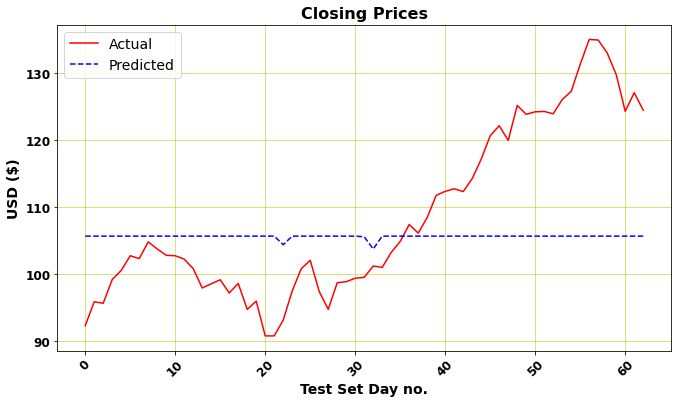

Mean Squared Error: 169.07135671687527
Mean Absolute Error: 10.569834111444385
R-squared score: -0.049
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2488
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2412
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2339
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2268
Epoch 5/100
9/9 [==============================] - 0s 889us/step - loss: 0.1266 - val_loss: 0.2200
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1215 - val_loss: 0.2133
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1167 - val_loss: 0.2070
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1120 - val_loss: 0.2010
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1076 - va

9/9 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.0439
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 0.0075 - val_loss: 0.0435
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 0.0074 - val_loss: 0.0428
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0072 - val_loss: 0.0424
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0071 - val_loss: 0.0419
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0070 - val_loss: 0.0414
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0409
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0405
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0066 - val_loss: 0.0401
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0064 - val_loss: 0.0397
Epoch 92/100
9

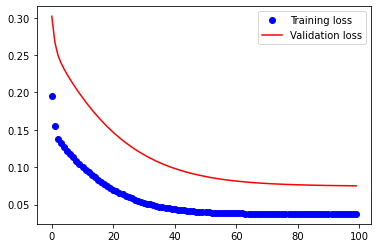

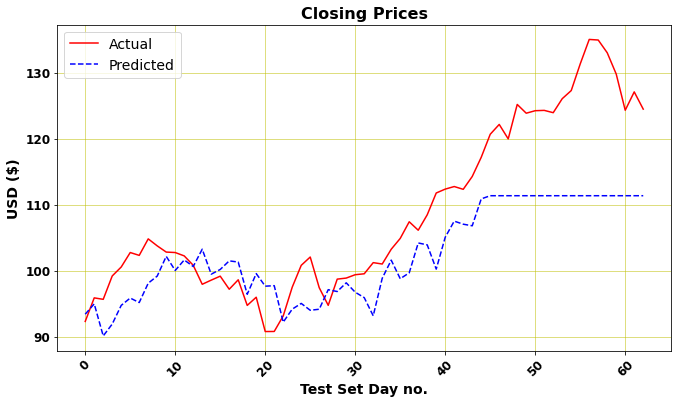

Mean Squared Error: 89.5236825500684
Mean Absolute Error: 7.374605564716643
R-squared score: 0.4446
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1068 - val_loss: 0.1305
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0728 - val_loss: 0.0911
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0470 - val_loss: 0.0631
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0289 - val_loss: 0.0446
Epoch 5/100
9/9 [==============================] - 0s 889us/step - loss: 0.0174 - val_loss: 0.0330
Epoch 6/100
9/9 [==============================] - 0s 889us/step - loss: 0.0102 - val_loss: 0.0263
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0228
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0210
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.020

9/9 [==============================] - 0s 1ms/step - loss: 3.0538e-04 - val_loss: 0.0133
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 3.0163e-04 - val_loss: 0.0133
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 3.0086e-04 - val_loss: 0.0133
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 2.9730e-04 - val_loss: 0.0132
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 2.9477e-04 - val_loss: 0.0134
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 3.0573e-04 - val_loss: 0.0132
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 2.9587e-04 - val_loss: 0.0132
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 2.8893e-04 - val_loss: 0.0132
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 2.8515e-04 - val_loss: 0.0132
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 2.8256e-04 - val_los

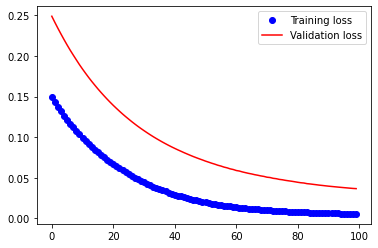

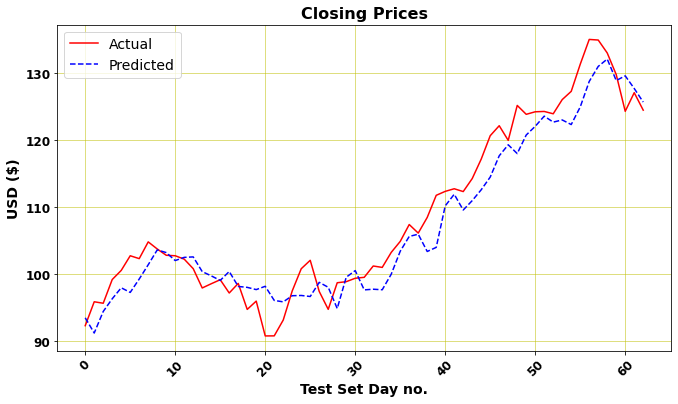

Mean Squared Error: 11.939054194629346
Mean Absolute Error: 2.8096339730515263
R-squared score: 0.9259
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1492 - val_loss: 0.2612
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2451
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1372 - val_loss: 0.2184
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.1704
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0843 - val_loss: 0.1063
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0325 - val_loss: 0.0680
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0097 - val_loss: 0.0566
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0566
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 

9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0423
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0421
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0421
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0419
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0418
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0417
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0416
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0415
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0414
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0413
Epoch 92/100
9/9 [======

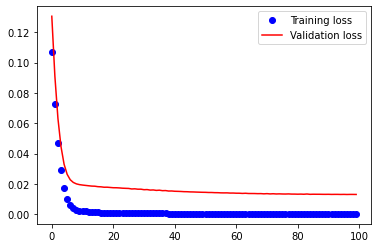

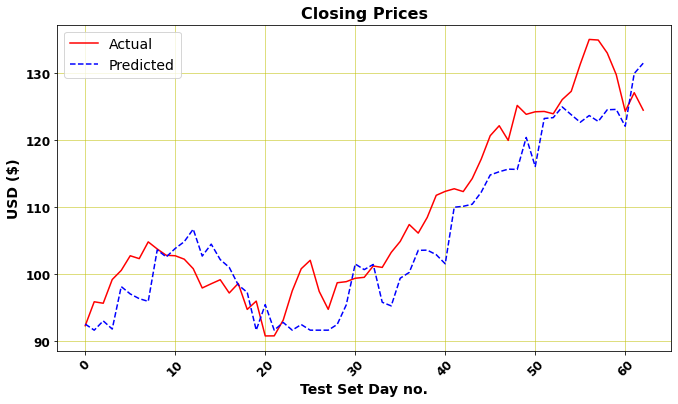

Mean Squared Error: 31.16863954054194
Mean Absolute Error: 4.661324745923238
R-squared score: 0.8066
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2970 - val_loss: 0.3446
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2045 - val_loss: 0.2476
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1336 - val_loss: 0.1796
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0832 - val_loss: 0.1362
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0505 - val_loss: 0.1107
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0305 - val_loss: 0.0975
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.0908
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0859
Epoch 9/100
9/9 [==============================] - 0s 889us/step - loss: 0.0091 - val_loss: 

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0691
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0699
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0683
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0692
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0014 - val_loss: 0.0690
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0014 - val_loss: 0.0684
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0687
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0014 - val_loss: 0.0682
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0014 - val_loss: 0.0685
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0685
Epoch 

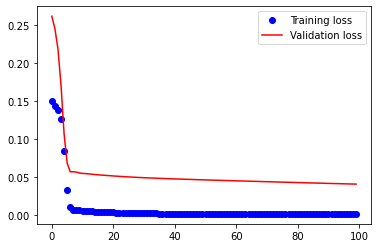

Mean Squared Error: 99.81860129885828
Mean Absolute Error: 8.174274051347036
R-squared score: 0.3807
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6971 - val_loss: 1.0009
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5475 - val_loss: 0.7955
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4183 - val_loss: 0.6237
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3108 - val_loss: 0.4837
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2271 - val_loss: 0.3712
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1607 - val_loss: 0.2844
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1111 - val_loss: 0.2196
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0749 - val_loss: 0.1727
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0505 - val_loss: 0.139

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0537
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0536
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0024 - val_loss: 0.0535
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0534
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0534
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0533
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0533
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0023 - val_loss: 0.0532
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0531
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0531
Epoch 93/100
9

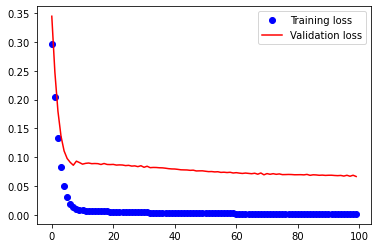

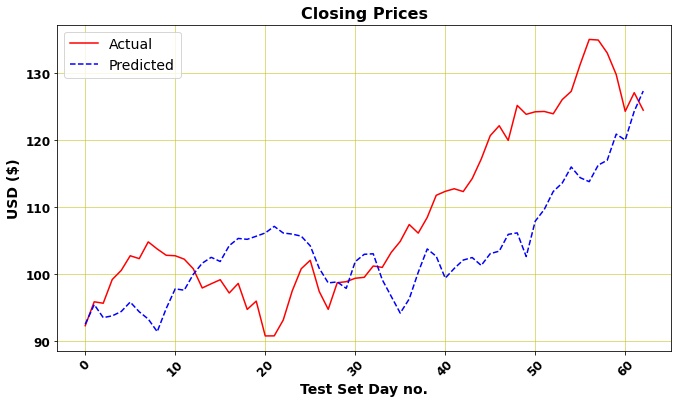

Mean Squared Error: 110.90822489949328
Mean Absolute Error: 8.783858749666729
R-squared score: 0.3119
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0509 - val_loss: 0.1120
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0353 - val_loss: 0.0885
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0228 - val_loss: 0.0697
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0557
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0459
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0398
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0364
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0346
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.03

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0306
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0306
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0305
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0306
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0306
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0304
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0304
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0303
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0013 - val_loss: 0.0304
Epoch 92/100
9/9 [==============================] - 0s 889us/step - loss: 0.0013 - val_loss: 0.0304
Epoch 93/100
9/9

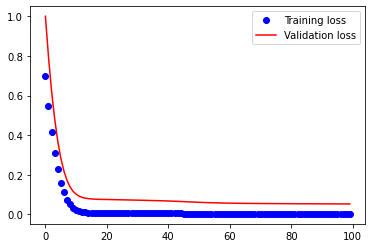

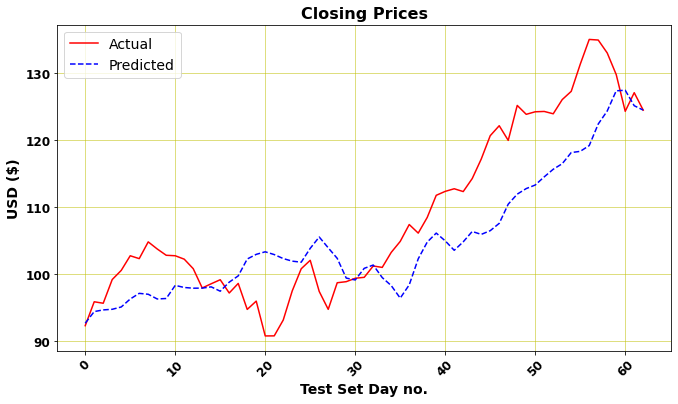

Mean Squared Error: 56.720002662639395
Mean Absolute Error: 6.183851571289062
R-squared score: 0.6481
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1487 - val_loss: 0.2309
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1373 - val_loss: 0.2039
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1108 - val_loss: 0.1688
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0811 - val_loss: 0.1296
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0564 - val_loss: 0.0959
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0369 - val_loss: 0.0701
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.0229 - val_loss: 0.0517
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0395
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0083 - val_lo

9/9 [==============================] - 0s 1ms/step - loss: 4.6913e-04 - val_loss: 0.0202
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6750e-04 - val_loss: 0.0201
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6635e-04 - val_loss: 0.0201
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 4.6605e-04 - val_loss: 0.0201
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6371e-04 - val_loss: 0.0201
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6290e-04 - val_loss: 0.0201
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6211e-04 - val_loss: 0.0201
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6126e-04 - val_loss: 0.0201
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6043e-04 - val_loss: 0.0201
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6008e-04 - val_loss

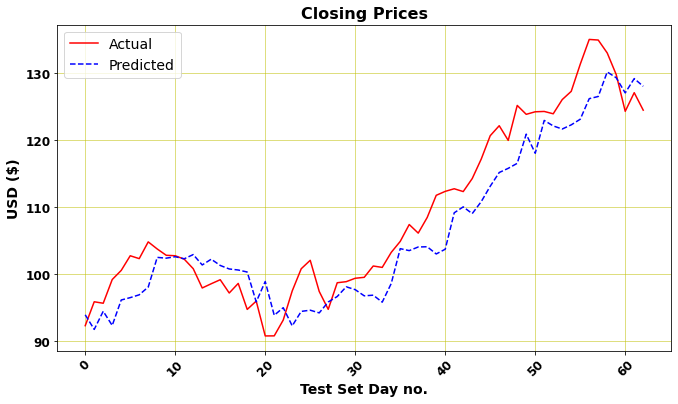

Mean Squared Error: 22.25984673258145
Mean Absolute Error: 3.991893447133867
R-squared score: 0.8619
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0893 - val_loss: 0.1079
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0571 - val_loss: 0.0724
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0339 - val_loss: 0.0489
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0349
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0276
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0243
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0036 - val_loss: 0.0231
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0229
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.

9/9 [==============================] - 0s 1ms/step - loss: 9.9621e-04 - val_loss: 0.0217
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 9.9455e-04 - val_loss: 0.0217
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 9.9296e-04 - val_loss: 0.0217
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 9.9015e-04 - val_loss: 0.0217
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 9.8808e-04 - val_loss: 0.0217
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 9.8661e-04 - val_loss: 0.0217
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 9.8502e-04 - val_loss: 0.0217
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 9.8148e-04 - val_loss: 0.0216
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 9.7984e-04 - val_loss: 0.0216
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 9.7798

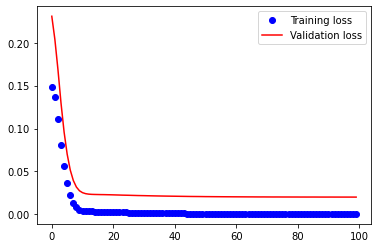

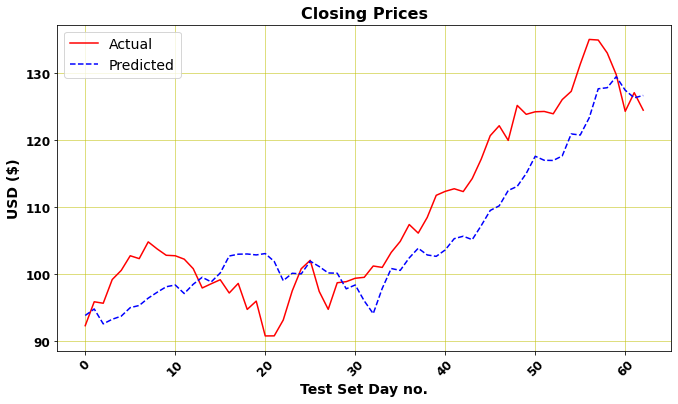

Mean Squared Error: 42.376093545627455
Mean Absolute Error: 5.565184570971292
R-squared score: 0.7371
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4213 - val_loss: 0.4254
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2961 - val_loss: 0.2900
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1977 - val_loss: 0.1920
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1253 - val_loss: 0.1258
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0766 - val_loss: 0.0839
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.0605
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.0258 - val_loss: 0.0496
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0151 - val_loss: 0.0460
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0096 - val

9/9 [==============================] - 0s 1ms/step - loss: 7.8414e-04 - val_loss: 0.0436
Epoch 82/100
9/9 [==============================] - 0s 889us/step - loss: 7.7896e-04 - val_loss: 0.0438
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 7.6846e-04 - val_loss: 0.0438
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 7.5831e-04 - val_loss: 0.0435
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 7.5041e-04 - val_loss: 0.0437
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 7.4590e-04 - val_loss: 0.0436
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 7.3565e-04 - val_loss: 0.0432
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 7.4709e-04 - val_loss: 0.0438
Epoch 89/100
9/9 [==============================] - 0s 889us/step - loss: 7.3580e-04 - val_loss: 0.0434
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 7.2247e-0

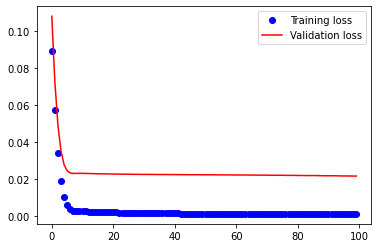

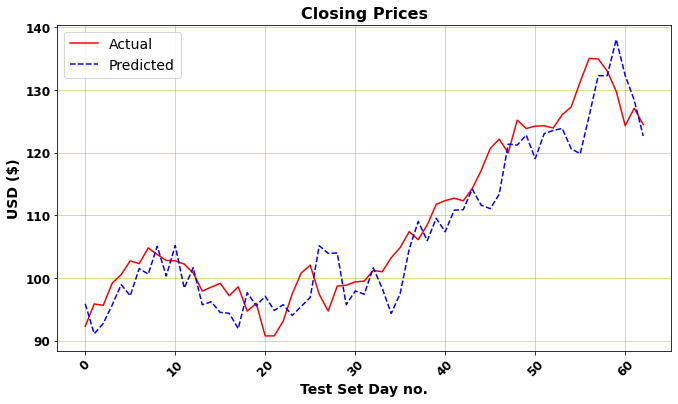

Mean Squared Error: 22.27588809793312
Mean Absolute Error: 3.85802716780599
R-squared score: 0.8618
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.9068 - val_loss: 1.2556
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7406 - val_loss: 1.0305
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5976 - val_loss: 0.8416
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.4775 - val_loss: 0.6854
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3814 - val_loss: 0.5558
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3017 - val_loss: 0.4524
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.2378 - val_loss: 0.3700
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1864 - val_loss: 0.3119
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1480 - val_l

9/9 [==============================] - 0s 1ms/step - loss: 0.0382 - val_loss: 0.0883
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0381 - val_loss: 0.0880
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0381 - val_loss: 0.0876
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0380 - val_loss: 0.0873
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0380 - val_loss: 0.0870
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.0867
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.0864
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0378 - val_loss: 0.0861
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0378 - val_loss: 0.0858
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0378 - val_loss: 0.0856
Epoch 92/100
9/9 [===============

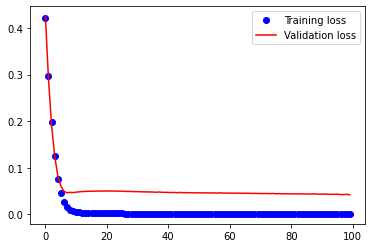

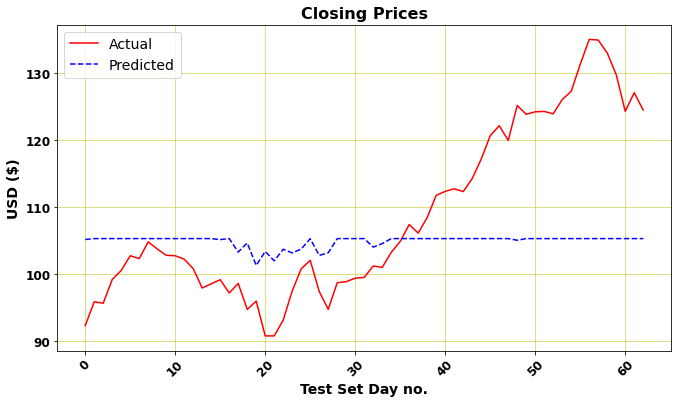

Mean Squared Error: 165.86368174632867
Mean Absolute Error: 10.190620263633125
R-squared score: -0.0291
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 1.1012 - val_loss: 1.6412
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8987 - val_loss: 1.3554
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7217 - val_loss: 1.1117
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5709 - val_loss: 0.9074
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.4497 - val_loss: 0.7375
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3488 - val_loss: 0.6008
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2684 - val_loss: 0.4931
Epoch 8/100
9/9 [==============================] - 0s 889us/step - loss: 0.2050 - val_loss: 0.4092
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1589 - val_los

9/9 [==============================] - 0s 889us/step - loss: 0.0384 - val_loss: 0.0973
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 0.0383 - val_loss: 0.0968
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0383 - val_loss: 0.0963
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 0.0382 - val_loss: 0.0959
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0381 - val_loss: 0.0955
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0381 - val_loss: 0.0951
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0380 - val_loss: 0.0947
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0380 - val_loss: 0.0943
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.0938
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0379 - val_loss: 0.0935
Epoch 92/100
9/

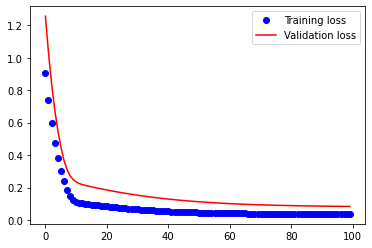

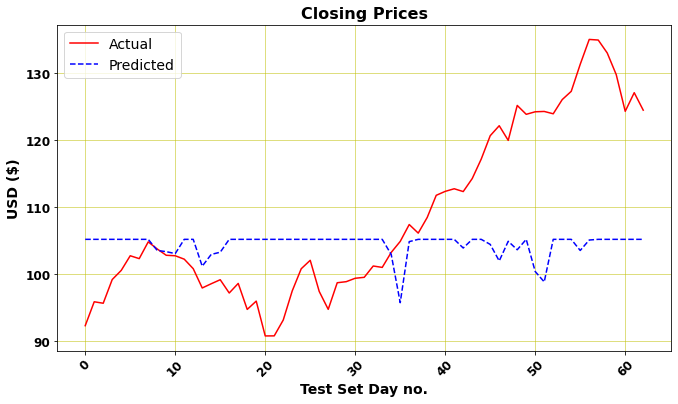

Mean Squared Error: 185.58924380094874
Mean Absolute Error: 10.779117265904022
R-squared score: -0.1514
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1880 - val_loss: 0.3074
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1716 - val_loss: 0.2846
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1571 - val_loss: 0.2651
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1444 - val_loss: 0.2486
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1336 - val_loss: 0.2347
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1242 - val_loss: 0.2232
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1176 - val_loss: 0.2144
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1129 - val_loss: 0.2074
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1086 - val_loss: 0.

Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0777
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0775
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0774
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0773
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0772
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 93/10

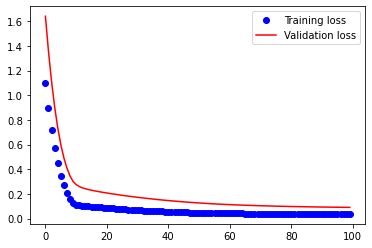

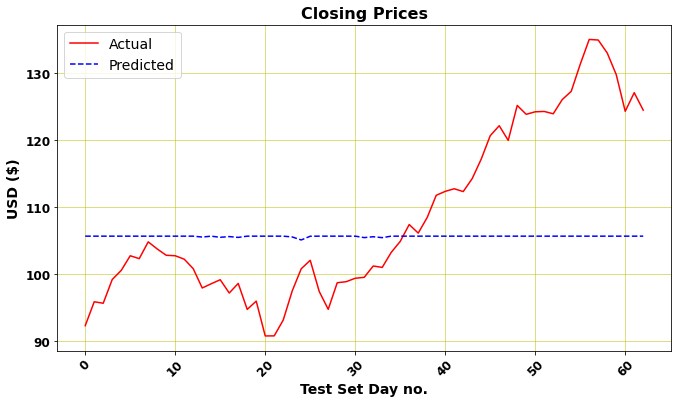

Mean Squared Error: 169.4876897251994
Mean Absolute Error: 10.593317751116073
R-squared score: -0.0515
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1488 - val_loss: 0.2306
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1405 - val_loss: 0.2067
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1202 - val_loss: 0.1778
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0910 - val_loss: 0.1427
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0645 - val_loss: 0.1068
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0429 - val_loss: 0.0787
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0582
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.0445
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 

9/9 [==============================] - 0s 1ms/step - loss: 6.1126e-04 - val_loss: 0.0230
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 6.0996e-04 - val_loss: 0.0230
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 6.0818e-04 - val_loss: 0.0230
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 6.0625e-04 - val_loss: 0.0230
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 6.0395e-04 - val_loss: 0.0230
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 6.0266e-04 - val_loss: 0.0230
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 6.0130e-04 - val_loss: 0.0229
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 6.0014e-04 - val_loss: 0.0229
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 5.9915e-04 - val_loss: 0.0229
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 5.9844e-04 - val_los

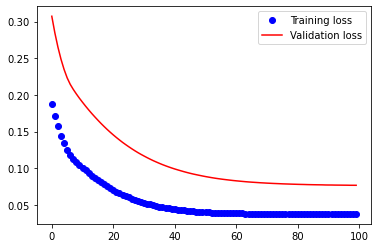

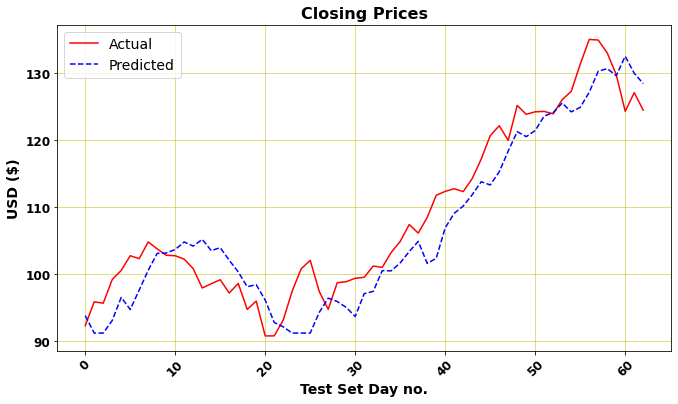

Mean Squared Error: 21.33224764302877
Mean Absolute Error: 3.895169198001923
R-squared score: 0.8677
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.1948

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0773
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0769
Epoch 89/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0768
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 92/100
9/9 [=====

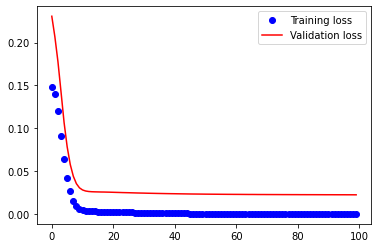

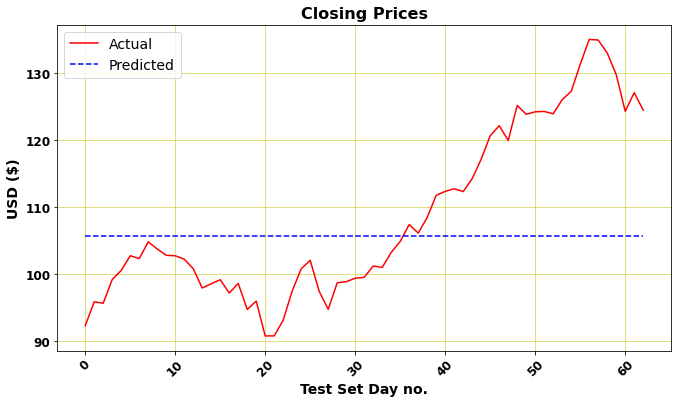

Mean Squared Error: 169.73961521964304
Mean Absolute Error: 10.623436178695439
R-squared score: -0.0531
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0271 - val_loss: 0.1170
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.1037
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.1036
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.1077
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.1087
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.1054
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.1047
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.1057
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.105

9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0792
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0795
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0783
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0787
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0778
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0776
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0772
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0014 - val_loss: 0.0773
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0014 - val_loss: 0.0764
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0766
Epoch 93/100
9/9 [======

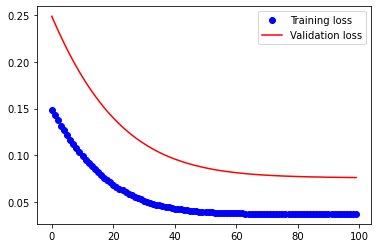

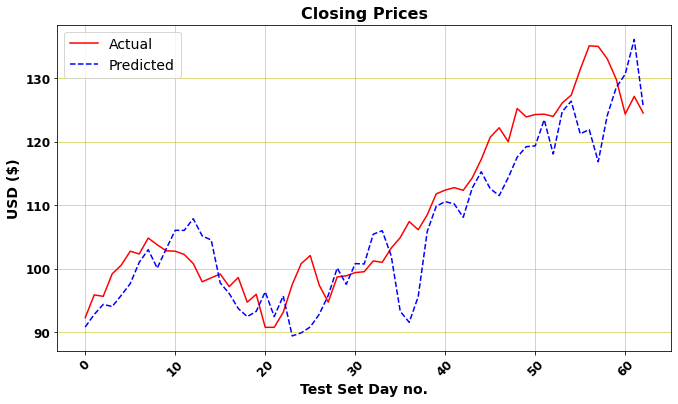

Mean Squared Error: 38.62486299375314
Mean Absolute Error: 4.797800304299975
R-squared score: 0.7604
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2343 - val_loss: 0.3374
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1989 - val_loss: 0.2916
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1679 - val_loss: 0.2567
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1417 - val_loss: 0.2356
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1279 - val_loss: 0.2249
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1227 - val_loss: 0.2178
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1182 - val_loss: 0.2115
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1138 - val_loss: 0.2056
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1097 - val_loss: 0.199

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0765
Epoch 93/100
9/9 [==

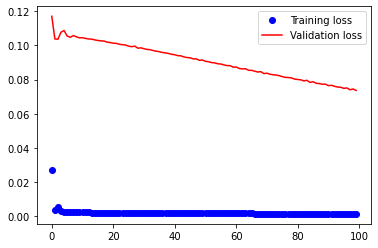

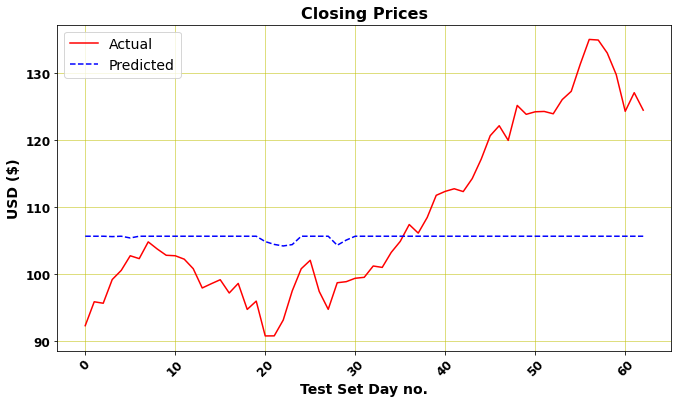

Mean Squared Error: 167.6885992705267
Mean Absolute Error: 10.509625715138272
R-squared score: -0.0404
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 46ms/step - loss: 0.4581 - val_loss: 0.6561
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4023 - val_loss: 0.5801
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3503 - val_loss: 0.5106
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3025 - val_loss: 0.4474
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2601 - val_loss: 0.3892
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2211 - val_loss: 0.3365
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1862 - val_loss: 0.2890
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1548 - val_loss: 0.2466
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1277 - val_lo

9/9 [==============================] - 0s 1000us/step - loss: 0.0016 - val_loss: 0.0246
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0246
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0245
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0244
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0244
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0244
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0243
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0243
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0242
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0013 - val_loss: 0.0242
Epoch 92/100
9/9 [=======

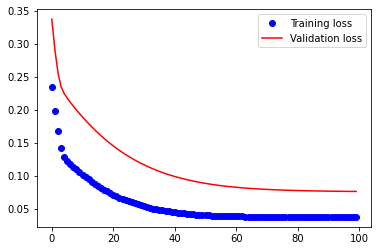

Mean Squared Error: 38.90218056791327
Mean Absolute Error: 5.156584101221478
R-squared score: 0.7586
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1491 - val_loss: 0.2490
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2413
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1374 - val_loss: 0.2339
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1319 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 889us/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_los

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0773
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0769
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0768
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 92/100
9/9 [=====

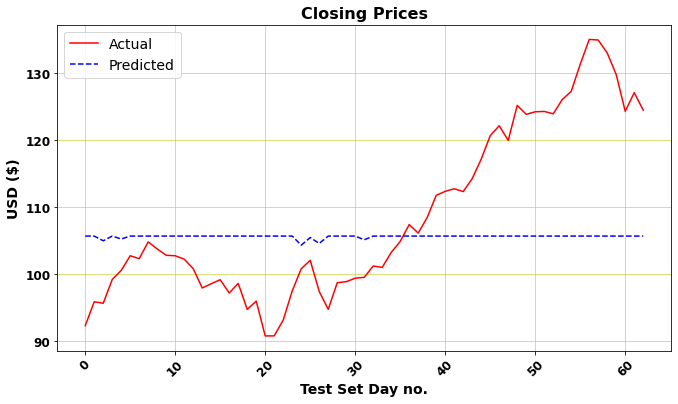

Mean Squared Error: 168.87764084503138
Mean Absolute Error: 10.55403981154669
R-squared score: -0.0477
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1279 - val_loss: 0.2103
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1123 - val_loss: 0.1884
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 0.0970 - val_loss: 0.1670
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0821 - val_loss: 0.1465
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0684 - val_loss: 0.1269
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0555 - val_loss: 0.1087
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0439 - val_loss: 0.0924
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0338 - val_loss: 0.0782
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0255 - val_loss

9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0280
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0280
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0280
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0280
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0280
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0280
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0279
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0279
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0279
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0278
Epoch 92/100
9/9 [=========

Mean Squared Error: 56.41591615285205
Mean Absolute Error: 6.3345087400871165
R-squared score: 0.65
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0805 - val_loss: 0.1019
Epoch 2/100
9/9 [==============================] - 0s 889us/step - loss: 0.0305 - val_loss: 0.0762
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0748
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0026 - val_loss: 0.0780
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0792
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0782
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0767
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0022 - val_loss: 0.0758
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0

9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0700
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0698
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0699
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0699
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0697
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0696
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0013 - val_loss: 0.0695
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0695
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0694
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0694
Epoch 92/100
9/9 [==========

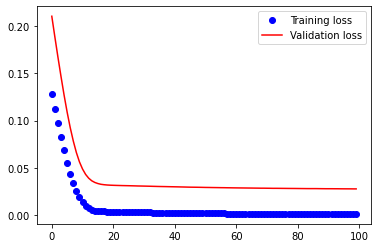

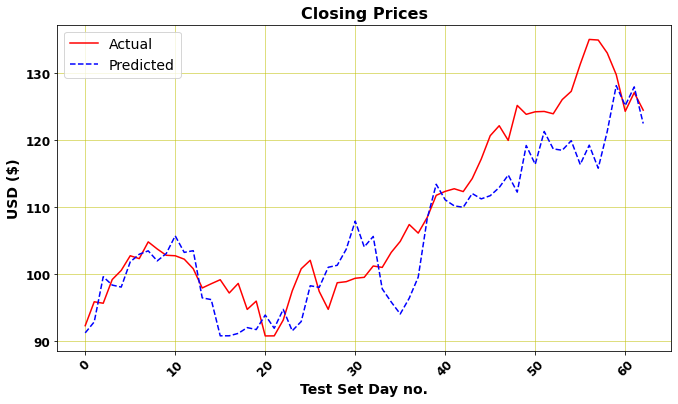

Mean Squared Error: 40.35196051332181
Mean Absolute Error: 4.846211151243177
R-squared score: 0.7496
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1529 - val_loss: 0.1707
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1033 - val_loss: 0.1194
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0660 - val_loss: 0.0844
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0402 - val_loss: 0.0625
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0239 - val_loss: 0.0502
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0444
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0093 - val_loss: 0.0423
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0068 - val_loss: 0.0420
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0058 - val_lo

9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0402
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0028 - val_loss: 0.0401
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0400
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0400
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0400
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0400
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0028 - val_loss: 0.0398
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0397
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0027 - val_loss: 0.0397
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0396
Epoch 92/100
9/9 [======

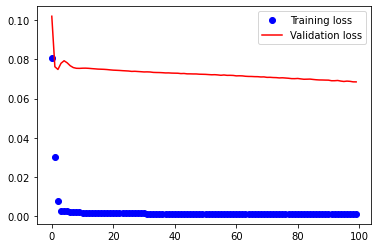

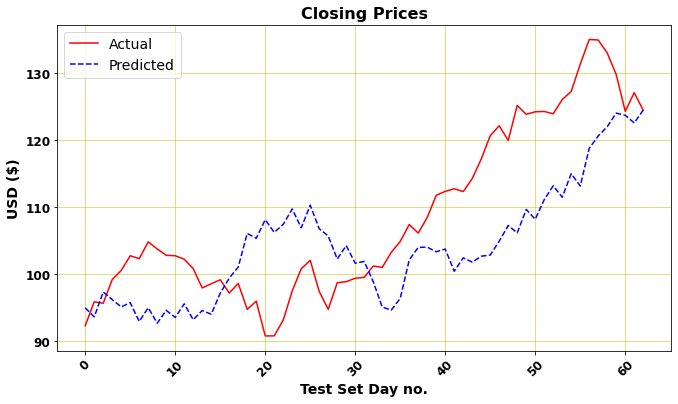

Mean Squared Error: 101.73672855694898
Mean Absolute Error: 8.709441275824654
R-squared score: 0.3688
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2736 - val_loss: 0.3253
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1840 - val_loss: 0.2365
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1165 - val_loss: 0.1806
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0817 - val_loss: 0.1477
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0689 - val_loss: 0.1280
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0584 - val_loss: 0.1118
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0487 - val_loss: 0.0973
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0398 - val_loss: 0.0843
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.07

9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0256
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0256
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0255
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0011 - val_loss: 0.0255
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0011 - val_loss: 0.0255
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0255
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0254
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0254
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0254
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0254
Epoch 92/100
9/9 [=========

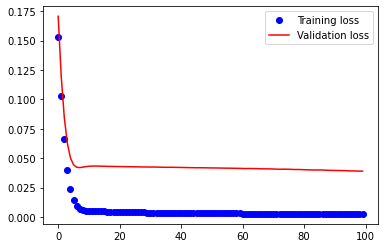

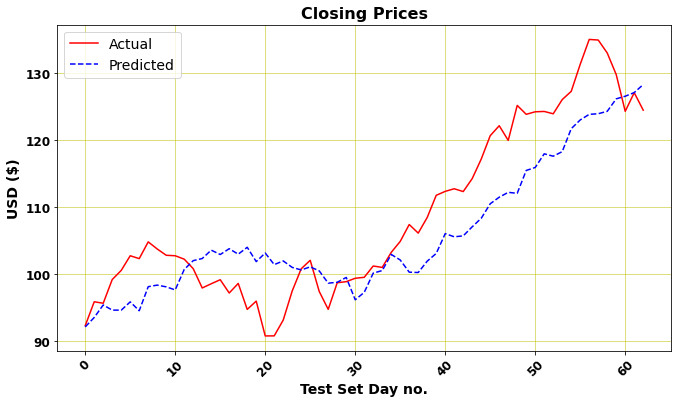

Mean Squared Error: 41.21491477434159
Mean Absolute Error: 5.456809416705419
R-squared score: 0.7443
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0742 - val_loss: 0.0971
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0394
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0028 - val_loss: 0.0246
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0236
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0238
Epoch 6/100
9/9 [==============================] - 0s 889us/step - loss: 0.0017 - val_loss: 0.0254
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0269
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0268
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 

Epoch 80/100
9/9 [==============================] - 0s 1ms/step - loss: 5.1997e-04 - val_loss: 0.0238
Epoch 81/100
9/9 [==============================] - 0s 1000us/step - loss: 5.1652e-04 - val_loss: 0.0239
Epoch 82/100
9/9 [==============================] - 0s 1000us/step - loss: 5.1207e-04 - val_loss: 0.0238
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 5.1137e-04 - val_loss: 0.0237
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 5.0490e-04 - val_loss: 0.0238
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 5.0579e-04 - val_loss: 0.0238
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 5.0002e-04 - val_loss: 0.0237
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 4.9753e-04 - val_loss: 0.0237
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 4.9843e-04 - val_loss: 0.0236
Epoch 89/100
9/9 [==============================] - 0s 1ms/st

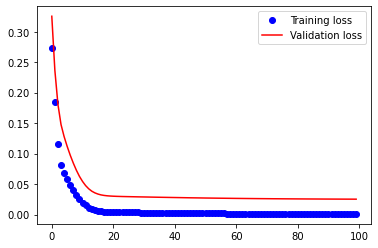

Mean Squared Error: 23.35404669562035
Mean Absolute Error: 4.006568893554688
R-squared score: 0.8551
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1215 - val_loss: 0.2133
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1167 - val_loss: 0.2070
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1120 - val_loss: 0.2011
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1076

9/9 [==============================] - 0s 1000us/step - loss: 0.0076 - val_loss: 0.0559
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0541
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0544
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0537
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0070 - val_loss: 0.0535
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0068 - val_loss: 0.0528
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0521
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0526
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 0.0065 - val_loss: 0.0521
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0063 - val_loss: 0.0518
Epoch 92/100
9/9 [====

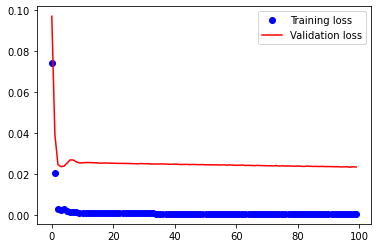

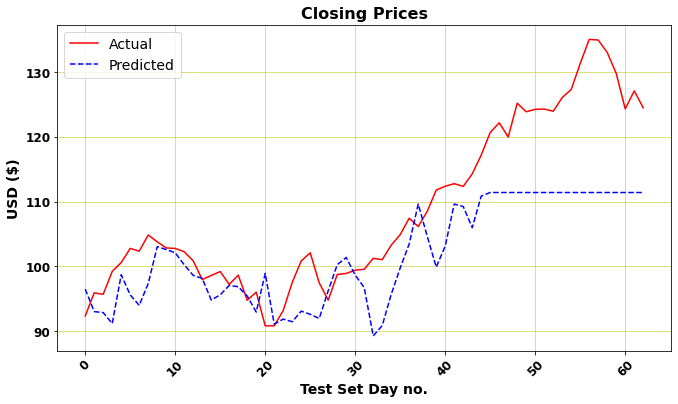

Mean Squared Error: 92.8581202391026
Mean Absolute Error: 7.4706640311879955
R-squared score: 0.4239
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 48ms/step - loss: 7.8520e-04 - val_loss: 0.0312
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 6.2826e-04 - val_loss: 0.0318
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 5.4646e-04 - val_loss: 0.0325
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 5.1947e-04 - val_loss: 0.0316
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 5.2160e-04 - val_loss: 0.0319
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 5.1064e-04 - val_loss: 0.0319
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 5.0723e-04 - val_loss: 0.0318
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 5.1241e-04 - val_loss: 0.0318
Epoch 9/100
9/9 [==============================] - 0s

Epoch 77/100
9/9 [==============================] - 0s 1ms/step - loss: 4.3693e-04 - val_loss: 0.0298
Epoch 78/100
9/9 [==============================] - 0s 1ms/step - loss: 4.3438e-04 - val_loss: 0.0301
Epoch 79/100
9/9 [==============================] - 0s 1ms/step - loss: 4.3112e-04 - val_loss: 0.0299
Epoch 80/100
9/9 [==============================] - 0s 1ms/step - loss: 4.2726e-04 - val_loss: 0.0299
Epoch 81/100
9/9 [==============================] - 0s 1000us/step - loss: 4.2827e-04 - val_loss: 0.0297
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 4.2802e-04 - val_loss: 0.0300
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 4.2781e-04 - val_loss: 0.0296
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 4.3059e-04 - val_loss: 0.0301
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 4.3568e-04 - val_loss: 0.0295
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 4.26

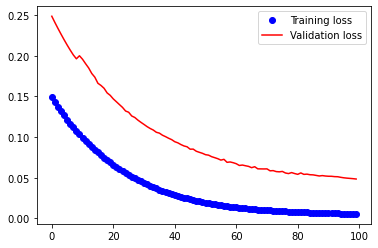

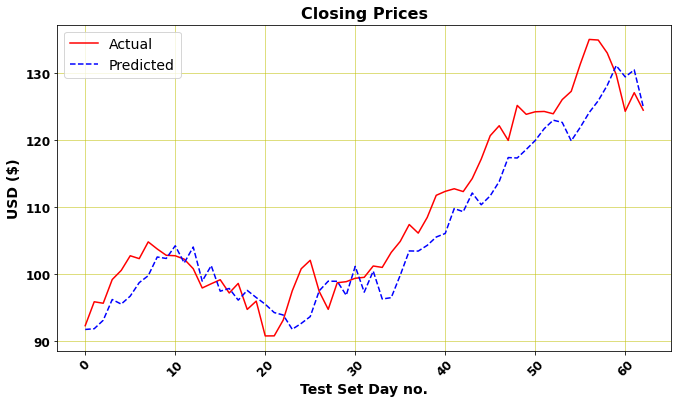

Mean Squared Error: 21.900768462500707
Mean Absolute Error: 3.844950460317461
R-squared score: 0.8641
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2499
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2417
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2343
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2271
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1266 - val_loss: 0.2202
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2136
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2072
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2011
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0764
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0764
Epoch 92/100
9/9 [=============

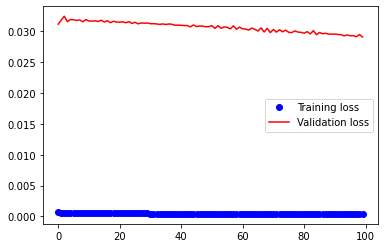

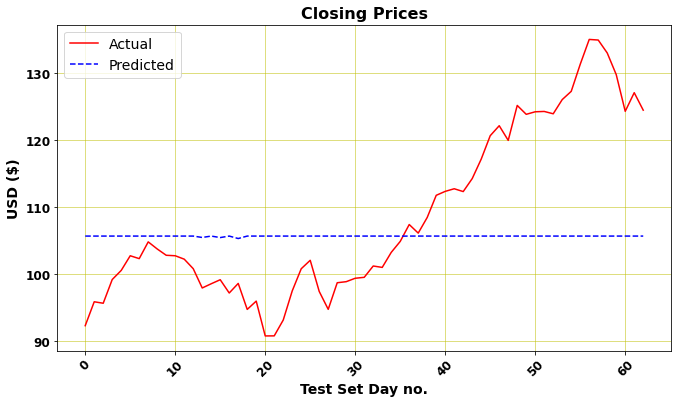

Mean Squared Error: 169.5627358404645
Mean Absolute Error: 10.610508109111485
R-squared score: -0.052
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 2.4944 - val_loss: 3.2053
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 2.0773 - val_loss: 2.6671
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 1.7100 - val_loss: 2.2110
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 1.3939 - val_loss: 1.8296
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 1.1336 - val_loss: 1.5115
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.9129 - val_loss: 1.2475
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7321 - val_loss: 1.0342
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5858 - val_loss: 0.8637
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4781 - val_loss: 0

Epoch 83/100
9/9 [==============================] - 0s 964us/step - loss: 0.0409 - val_loss: 0.1064
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0407 - val_loss: 0.1056
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0405 - val_loss: 0.1050
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0404 - val_loss: 0.1043
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0402 - val_loss: 0.1037
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0400 - val_loss: 0.1031
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0399 - val_loss: 0.1026
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0398 - val_loss: 0.1019
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0396 - val_loss: 0.1014
Epoch 92/100
9/9 [==============================] - 0s 889us/step - loss: 0.0395 - val_loss: 0.1009
Epoch 93/1

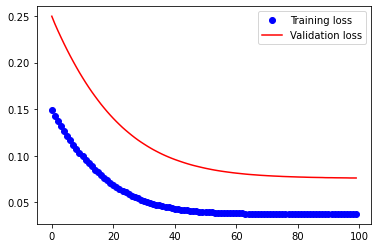

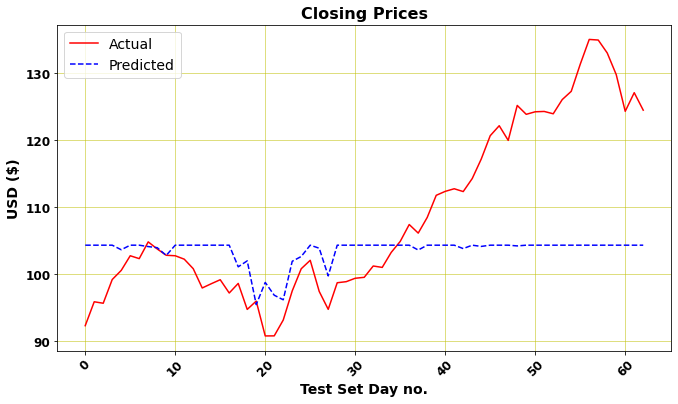

Mean Squared Error: 169.83572844076048
Mean Absolute Error: 9.756037749984499
R-squared score: -0.0537
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.8423 - val_loss: 1.2837
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7402 - val_loss: 1.1362
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6475 - val_loss: 1.0038
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5645 - val_loss: 0.8873
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4934 - val_loss: 0.7852
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4297 - val_loss: 0.6962
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3743 - val_loss: 0.6168
Epoch 8/100
9/9 [==============================] - 0s 889us/step - loss: 0.3256 - val_loss: 0.5472
Epoch 9/100
9/9 [==============================] - 0s 889us/step - loss: 0.2841 - val_loss:

9/9 [==============================] - 0s 1ms/step - loss: 0.0384 - val_loss: 0.0879
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0383 - val_loss: 0.0875
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0382 - val_loss: 0.0871
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 0.0382 - val_loss: 0.0867
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0381 - val_loss: 0.0864
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0380 - val_loss: 0.0861
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0380 - val_loss: 0.0858
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.0855
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0379 - val_loss: 0.0852
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0379 - val_loss: 0.0849
Epoch 92/100
9/9 [==

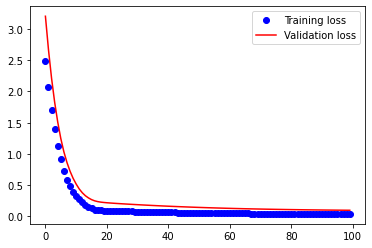

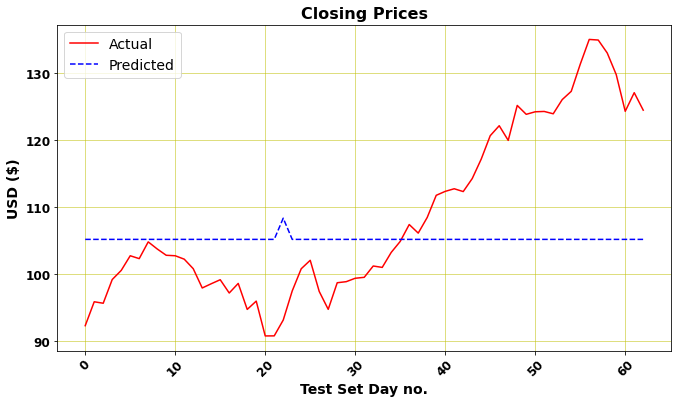

Mean Squared Error: 174.24598475797123
Mean Absolute Error: 10.602927034078933
R-squared score: -0.0811
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0802 - val_loss: 0.1307
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0430 - val_loss: 0.0900
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 0.0190 - val_loss: 0.0652
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0540
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0029 - val_loss: 0.0507
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0502
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0501
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0500
Epoch 9/100
9/9 [==============================] - 0s 889us/step - loss: 0.0021 - val_l

9/9 [==============================] - 0s 1000us/step - loss: 0.0011 - val_loss: 0.0460
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0460
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0459
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0459
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0458
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0458
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0011 - val_loss: 0.0457
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0457
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0457
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0011 - val_loss: 0.0456
Epoch 92/100
9/9 [======

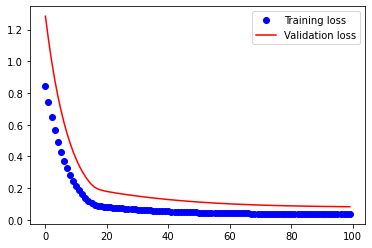

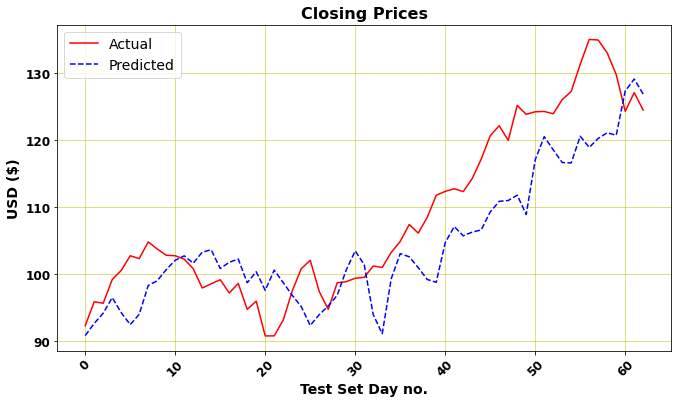

Mean Squared Error: 54.409843320872994
Mean Absolute Error: 6.18343508861142
R-squared score: 0.6624
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2486
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1374 - val_loss: 0.2337
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0774
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 92/100
9/9 [===============

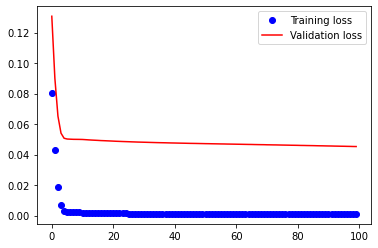

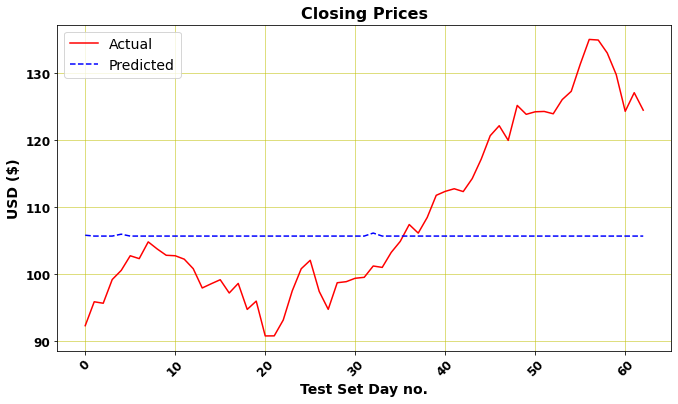

Mean Squared Error: 169.90675000342068
Mean Absolute Error: 10.637006812841024
R-squared score: -0.0541
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1502 - val_loss: 0.2906
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1434 - val_loss: 0.2701
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1376 - val_loss: 0.2560
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1319 - val_loss: 0.2452
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1267 - val_loss: 0.2357
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1216 - val_loss: 0.2274
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2198
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1121 - val_loss: 0.2128
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1077 - val_loss: 0.

9/9 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0470
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0477
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0462
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0466
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0457
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0458
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0454
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0449
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0063 - val_loss: 0.0445
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0444
Epoch 93/100
9/9 [============

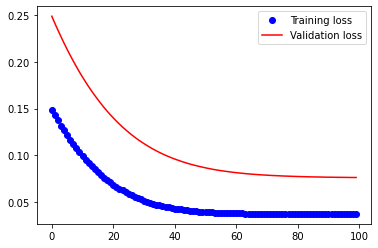

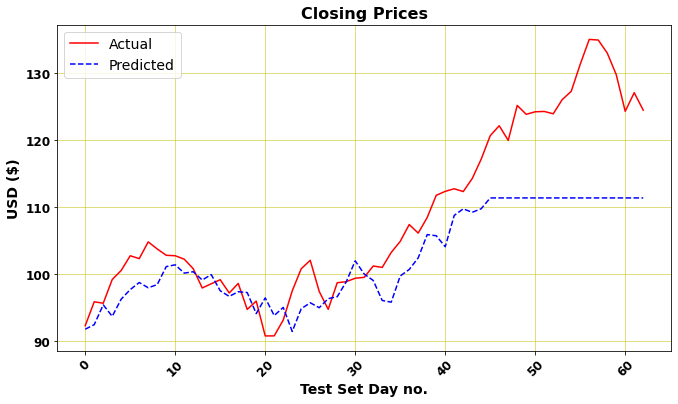

Mean Squared Error: 83.31703102858815
Mean Absolute Error: 6.78781124106368
R-squared score: 0.4831
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2395 - val_loss: 0.3704
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1707 - val_loss: 0.2871
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1383 - val_loss: 0.2517
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1326 - val_loss: 0.2389
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1277 - val_loss: 0.2308
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1229 - val_loss: 0.2237
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1183 - val_loss: 0.2172
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1138 - val_loss: 0.2110
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1096 - val_loss: 0.2050

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0775
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0771
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 92/100
9/9 [==============================] - ETA: 0s - loss: 0.037 - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0767
Epo

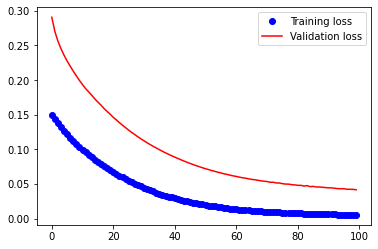

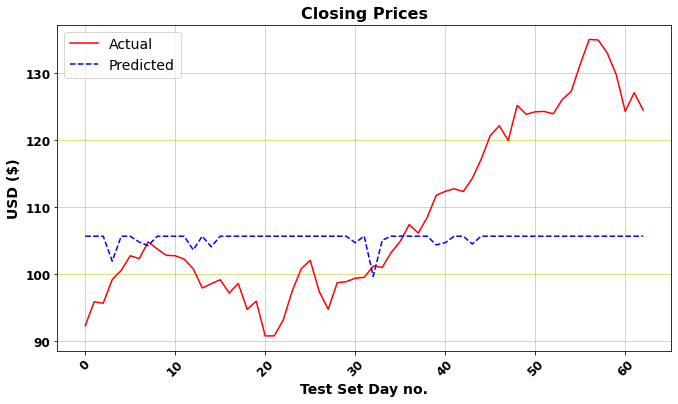

Mean Squared Error: 168.93583524651962
Mean Absolute Error: 10.46932773166233
R-squared score: -0.0481
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 53ms/step - loss: 0.0470 - val_loss: 0.0974
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0324 - val_loss: 0.0774
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0616
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0504
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0435
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0401
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0387
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0382
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.038

9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0355
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 0.0012 - val_loss: 0.0355
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 0.0012 - val_loss: 0.0354
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0354
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0354
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 0.0012 - val_loss: 0.0354
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0353
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0353
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0353
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0353
Epoch 92/100
9/9 [===

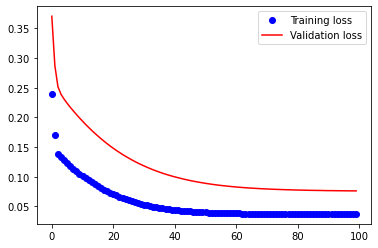

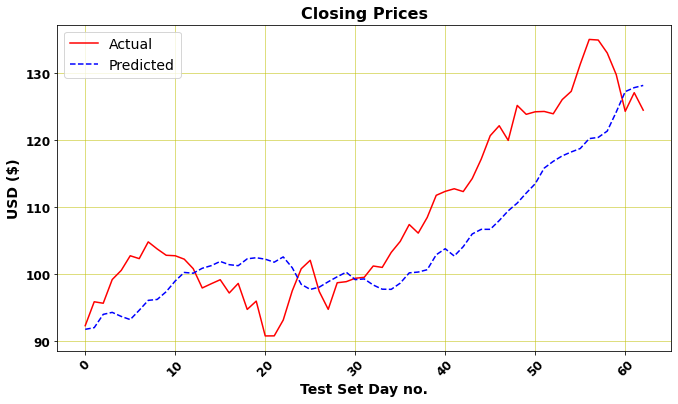

Mean Squared Error: 59.1141969045594
Mean Absolute Error: 6.514239992156497
R-squared score: 0.6332
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2510
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2426
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2349
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2277
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2207
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1215 - val_loss: 0.2140
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2076
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2015
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.1956

9/9 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0455
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0449
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0443
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0439
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0434
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0428
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0424
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0066 - val_loss: 0.0419
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.0414
Epoch 92/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0064 - val_loss: 0.0411
Epoch 93/100
9/9 [=========

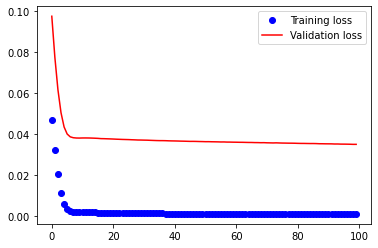

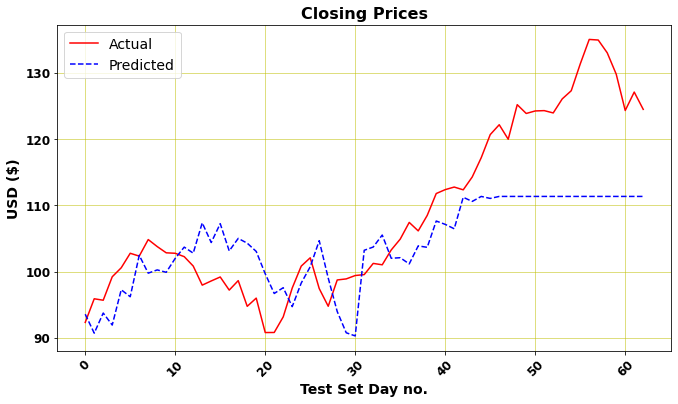

Mean Squared Error: 91.36511293688861
Mean Absolute Error: 7.638890198862228
R-squared score: 0.4332
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0524 - val_loss: 0.0500
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0228
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0176
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0196
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0199
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0187
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 9.5295e-04 - val_loss: 0.0178
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 8.4022e-04 - val_loss: 0.0176
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 8.1159e-04 - val

9/9 [==============================] - 0s 1ms/step - loss: 3.8603e-04 - val_loss: 0.0174
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8555e-04 - val_loss: 0.0173
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8668e-04 - val_loss: 0.0173
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8688e-04 - val_loss: 0.0174
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8725e-04 - val_loss: 0.0173
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8520e-04 - val_loss: 0.0174
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8648e-04 - val_loss: 0.0174
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8496e-04 - val_loss: 0.0173
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8578e-04 - val_loss: 0.0174
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 3.8470e-04 - val_loss: 

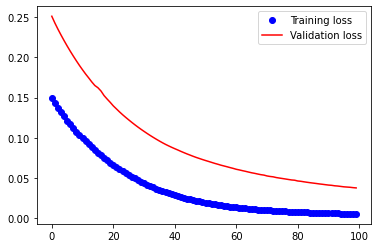

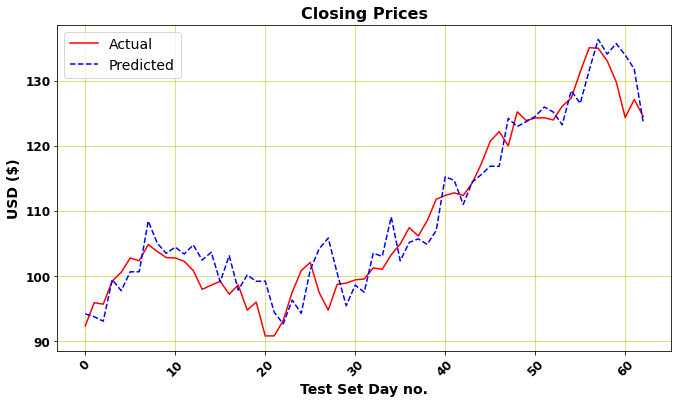

Mean Squared Error: 13.93038221021461
Mean Absolute Error: 2.923778688251799
R-squared score: 0.9136
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2480
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2405
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2332
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2262
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2194
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2128
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2064
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2004
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.1945
E

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0779
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0778
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0777
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0776
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0775
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0775
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0774
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0773
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 93/100
9/9 [============

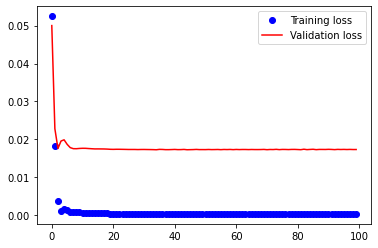

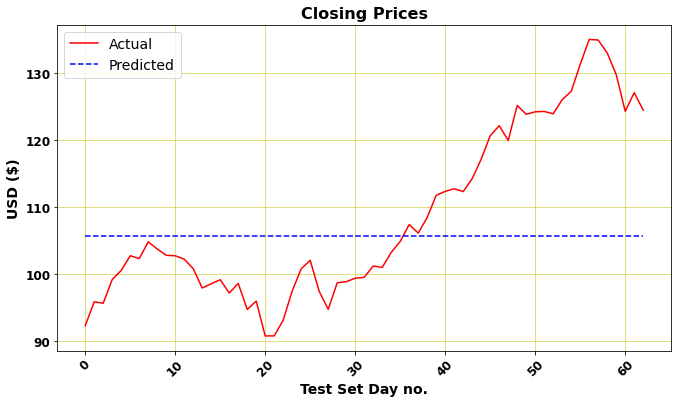

Mean Squared Error: 169.73961521964304
Mean Absolute Error: 10.623436178695439
R-squared score: -0.0531
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2485
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2410
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1374 - val_loss: 0.2337
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2266
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2197
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1215 - val_loss: 0.2131
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss:

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0774
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 92/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0768
Epoch 93/100
9/9 

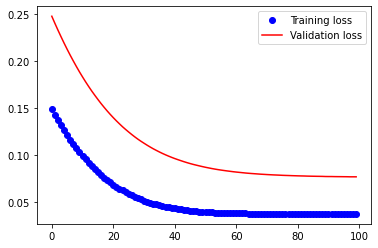

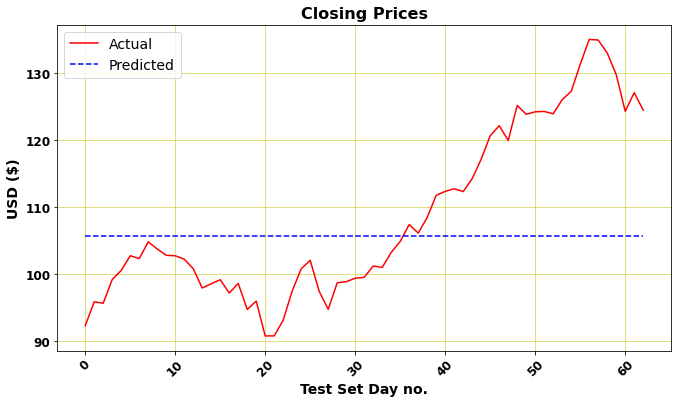

Mean Squared Error: 169.73961521964304
Mean Absolute Error: 10.623436178695439
R-squared score: -0.0531
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss:

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0770
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0767
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 93/100
9/9 [=========

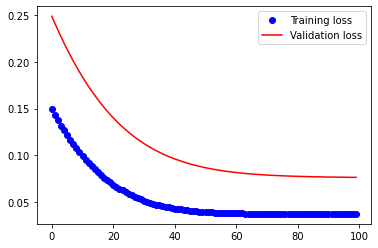

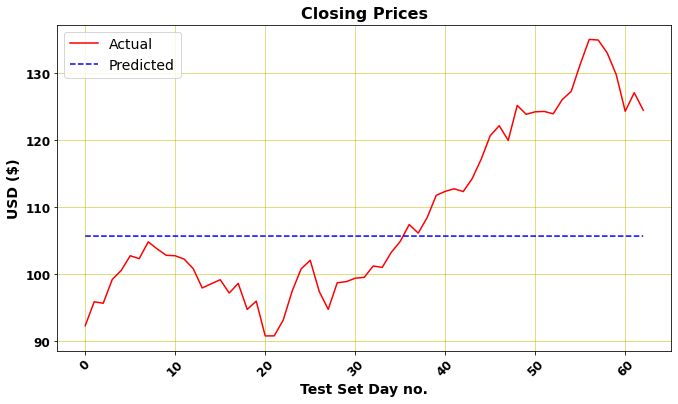

Mean Squared Error: 169.74593541164973
Mean Absolute Error: 10.623674264245414
R-squared score: -0.0531
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2464 - val_loss: 0.3517
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2006 - val_loss: 0.2956
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1615 - val_loss: 0.2574
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1358 - val_loss: 0.2377
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1280 - val_loss: 0.2272
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1231 - val_loss: 0.2196
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1185 - val_loss: 0.2130
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1141 - val_loss: 0.2069
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1100 - val_loss: 0.

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0767
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0765
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0765
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0765
Epoch 93/100
9/9 [=========

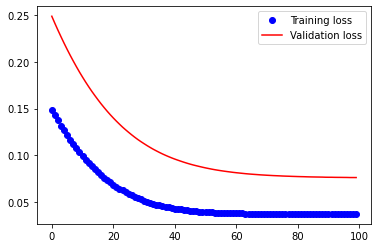

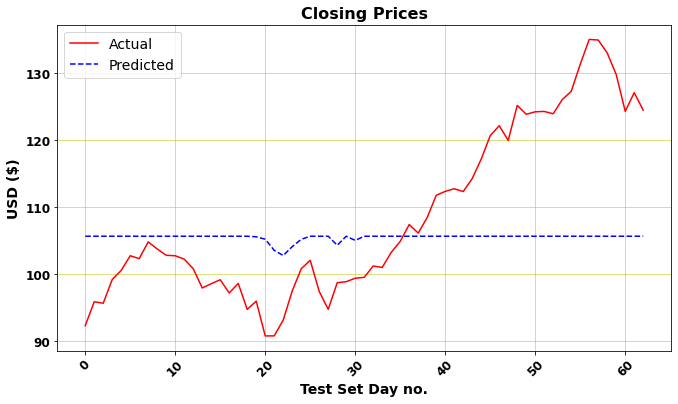

Mean Squared Error: 166.88568489482756
Mean Absolute Error: 10.469203003084699
R-squared score: -0.0354
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0882 - val_loss: 0.1446
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0630 - val_loss: 0.1146
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0422 - val_loss: 0.0891
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0263 - val_loss: 0.0687
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0536
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0436
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0048 - val_loss: 0.0376
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0344
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.

9/9 [==============================] - 0s 1ms/step - loss: 5.9925e-04 - val_loss: 0.0319
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 5.9864e-04 - val_loss: 0.0319
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 5.9807e-04 - val_loss: 0.0318
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 5.9803e-04 - val_loss: 0.0319
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 5.9772e-04 - val_loss: 0.0318
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 5.9669e-04 - val_loss: 0.0319
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 5.9650e-04 - val_loss: 0.0319
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 5.9628e-04 - val_loss: 0.0319
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 5.9610e-04 - val_loss: 0.0318
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 5.9509e-04 - val_l

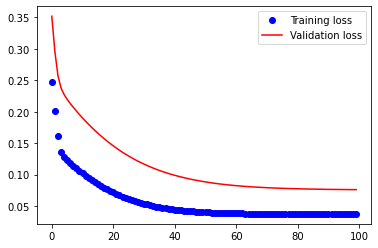

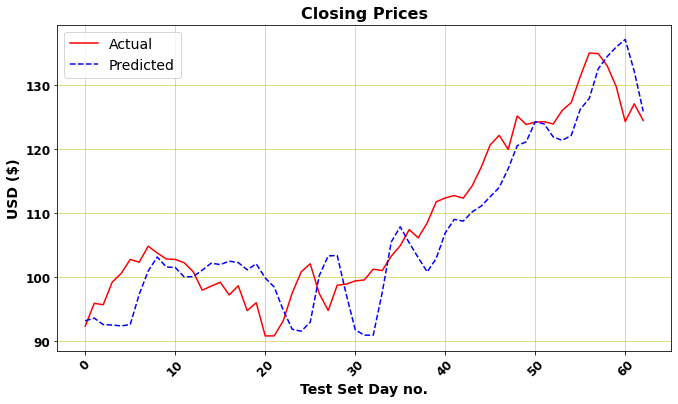

Mean Squared Error: 30.895914848352188
Mean Absolute Error: 4.725835636338974
R-squared score: 0.8083
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 48ms/step - loss: 0.0925 - val_loss: 0.1013
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0289 - val_loss: 0.0512
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 0.0100 - val_loss: 0.0329
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0269
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0020 - val_loss: 0.0257
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0256
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0018 - val_loss: 0.0255
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0254
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0017 - val_l

9/9 [==============================] - 0s 1ms/step - loss: 8.9108e-04 - val_loss: 0.0221
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 8.8942e-04 - val_loss: 0.0220
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 8.8696e-04 - val_loss: 0.0220
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 8.8550e-04 - val_loss: 0.0219
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 8.8200e-04 - val_loss: 0.0219
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 8.7824e-04 - val_loss: 0.0219
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 8.7690e-04 - val_loss: 0.0218
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 8.7372e-04 - val_loss: 0.0218
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 8.7078e-04 - val_loss: 0.0218
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 8.6828e-04 - v

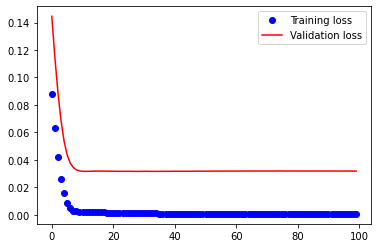

Mean Squared Error: 31.941739179231746
Mean Absolute Error: 5.092336360041544
R-squared score: 0.8018
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.0386
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0044 - val_loss: 0.0264
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0016 - val_loss: 0.0253
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0252
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0254
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0260
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0259
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0255
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - va

9/9 [==============================] - 0s 1ms/step - loss: 8.5610e-04 - val_loss: 0.0222
Epoch 79/100
9/9 [==============================] - 0s 1ms/step - loss: 8.5126e-04 - val_loss: 0.0222
Epoch 80/100
9/9 [==============================] - 0s 1ms/step - loss: 8.4786e-04 - val_loss: 0.0221
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 8.4446e-04 - val_loss: 0.0221
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 8.4078e-04 - val_loss: 0.0220
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 8.3949e-04 - val_loss: 0.0220
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 8.4258e-04 - val_loss: 0.0219
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 8.3012e-04 - val_loss: 0.0218
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 8.2640e-04 - val_loss: 0.0218
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 8.2461e-04 - val_loss

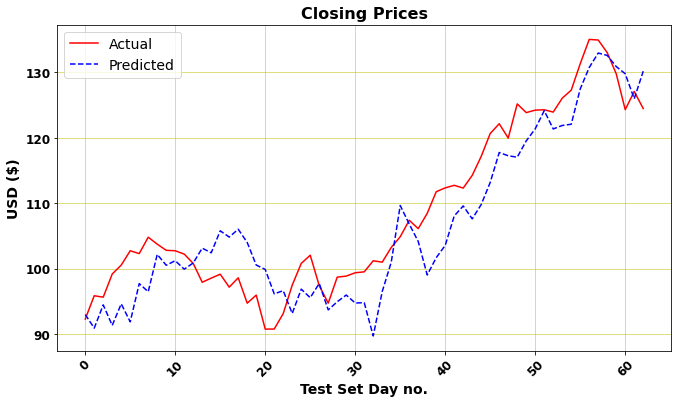

Mean Squared Error: 29.044898017026306
Mean Absolute Error: 4.57237856685578
R-squared score: 0.8198
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2495
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2418
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2344
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2272
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2203
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2137
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2073
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2011
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.1952
E

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0764
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0764
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0763
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0762
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0762
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0761
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0760
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0759
Epoch 92/100
9/9 [============

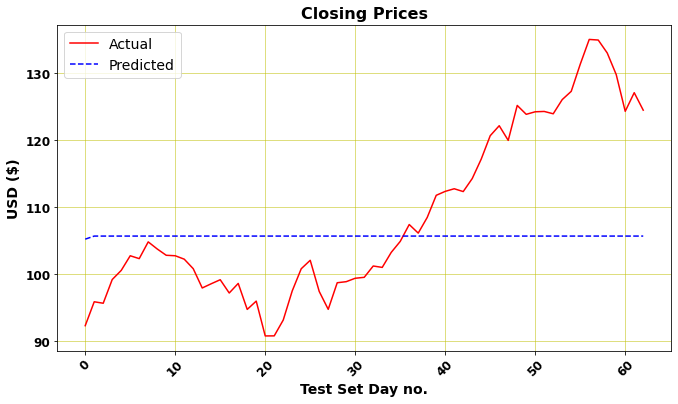

Mean Squared Error: 169.54721311588978
Mean Absolute Error: 10.616115956294955
R-squared score: -0.0519
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 3.2023 - val_loss: 4.3754
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 2.8849 - val_loss: 3.8828
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 2.5884 - val_loss: 3.4105
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 2.2881 - val_loss: 2.8758
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 1.8508 - val_loss: 2.2384
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 1.3762 - val_loss: 1.6505
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.9871 - val_loss: 1.1869
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6873 - val_loss: 0.8437
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4727 - val_loss: 0.594

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.1106
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.1104
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0077 - val_loss: 0.1101
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0076 - val_loss: 0.1096
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0075 - val_loss: 0.1092
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.1089
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.1087
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0071 - val_loss: 0.1085
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0070 - val_loss: 0.1082
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.1077
Epoch 93

Mean Squared Error: 162.01741813770846
Mean Absolute Error: 10.83178526906622
R-squared score: -0.0052
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3278 - val_loss: 0.3947
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2305 - val_loss: 0.2572
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1376 - val_loss: 0.1540
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0635 - val_loss: 0.0906
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0647
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0606
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0622
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0624
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0613

9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0492
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0490
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0027 - val_loss: 0.0489
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0488
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0027 - val_loss: 0.0487
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0485
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0484
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0482
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0481
Epoch 92/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0026 - val_loss: 0.0480
Epoch 93/100
9/9 [======

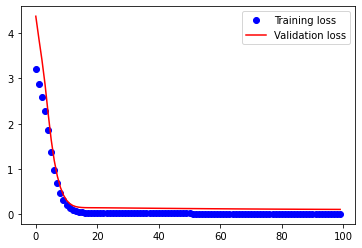

Mean Squared Error: 101.21943281279991
Mean Absolute Error: 8.43459415704055
R-squared score: 0.372
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1599 - val_loss: 0.2644
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1496 - val_loss: 0.2508
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1407 - val_loss: 0.2398
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1331 - val_loss: 0.2307
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1270 - val_loss: 0.2228
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1218 - val_loss: 0.2158
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1170 - val_loss: 0.2092
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1123 - val_loss: 0.2030
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1079 - val_loss: 0.1970
Ep

9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0772
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0768
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0767
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0766
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 93/100
9/9 [===

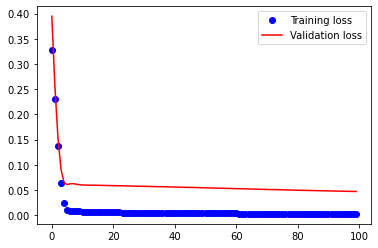

Mean Squared Error: 168.752450959046
Mean Absolute Error: 10.557732091889884
R-squared score: -0.047
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1491 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1432 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.

Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0077 - val_loss: 0.0497
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0490
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0486
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0072 - val_loss: 0.0480
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0071 - val_loss: 0.0476
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0470
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0466
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0460
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0457
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0452
Epoch 93/100

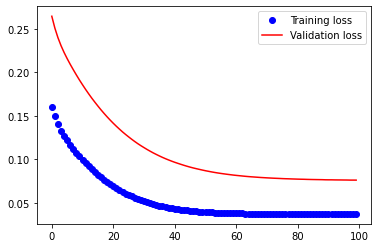

Mean Squared Error: 91.16217696789816
Mean Absolute Error: 7.54823202561539
R-squared score: 0.4344
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3009 - val_loss: 0.5038
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2331 - val_loss: 0.4156
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1796 - val_loss: 0.3515
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1445 - val_loss: 0.3078
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1307 - val_loss: 0.2810
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1243 - val_loss: 0.2645
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1195 - val_loss: 0.2536
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1152 - val_loss: 0.2451
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1111 - val_loss: 0.2

Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0376 - val_loss: 0.0871
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0869
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0867
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0866
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0864
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0863
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0862
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0860
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0859
Epoch 92/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0858
Epoch 93/100

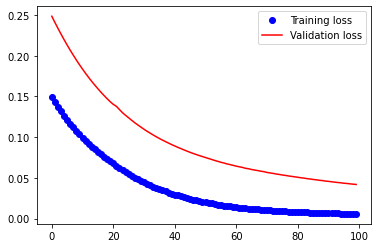

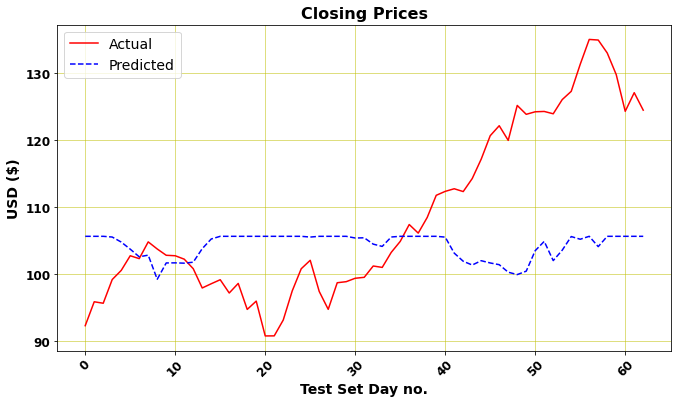

Mean Squared Error: 195.26647699133503
Mean Absolute Error: 11.11647225464255
R-squared score: -0.2115
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 47ms/step - loss: 0.5466 - val_loss: 0.7757
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4674 - val_loss: 0.6709
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3968 - val_loss: 0.5801
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3351 - val_loss: 0.5020
Epoch 5/100
9/9 [==============================] - 0s 889us/step - loss: 0.2834 - val_loss: 0.4352
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2383 - val_loss: 0.3800
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2001 - val_loss: 0.3332
Epoch 8/100
9/9 [==============================] - 0s 889us/step - loss: 0.1676 - val_loss: 0.2943
Epoch 9/100
9/9 [==============================] - 0s 889us/step - loss: 0.1410 - val

9/9 [==============================] - 0s 1ms/step - loss: 0.0378 - val_loss: 0.0864
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0378 - val_loss: 0.0861
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0378 - val_loss: 0.0859
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0856
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0854
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0852
Epoch 88/100
9/9 [==============================] - 0s 999us/step - loss: 0.0377 - val_loss: 0.0850
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0849
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0846
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0376 - val_loss: 0.0845
Epoch 92/100
9/9 [====

Mean Squared Error: 192.69136014373484
Mean Absolute Error: 11.038887228500126
R-squared score: -0.1955
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss:

9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0773
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0771
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0769
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0768
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0767
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0767
Epoch 92/100
9/9

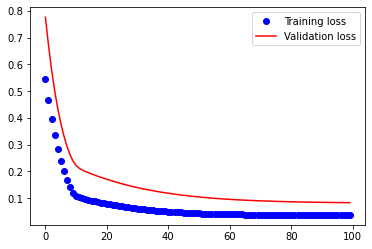

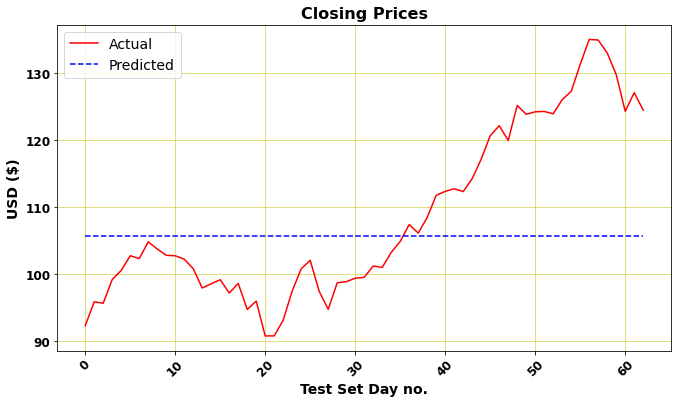

Mean Squared Error: 169.73961521964304
Mean Absolute Error: 10.623436178695439
R-squared score: -0.0531
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 1.4135 - val_loss: 1.8826
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 1.0739 - val_loss: 1.4268
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7872 - val_loss: 1.0550
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5561 - val_loss: 0.7626
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3831 - val_loss: 0.5379
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2528 - val_loss: 0.3742
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1616 - val_loss: 0.2595
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0999 - val_loss: 0.1829
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0619 - val_loss: 0.132

9/9 [==============================] - 0s 1000us/step - loss: 0.0023 - val_loss: 0.0484
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 0.0023 - val_loss: 0.0483
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0483
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 0.0023 - val_loss: 0.0482
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0022 - val_loss: 0.0482
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0481
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0022 - val_loss: 0.0480
Epoch 89/100
9/9 [==============================] - 0s 889us/step - loss: 0.0022 - val_loss: 0.0479
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0479
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0021 - val_loss: 0.0478
Epoch 92/100
9/9 

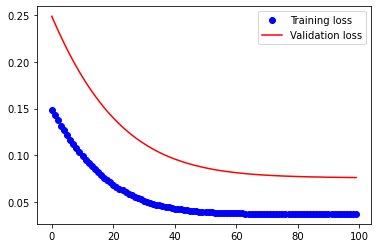

Mean Squared Error: 81.7525038399228
Mean Absolute Error: 7.46760608482918
R-squared score: 0.4928
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.1948
Epo

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 93/100
9/9 [==

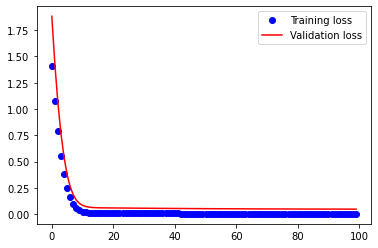

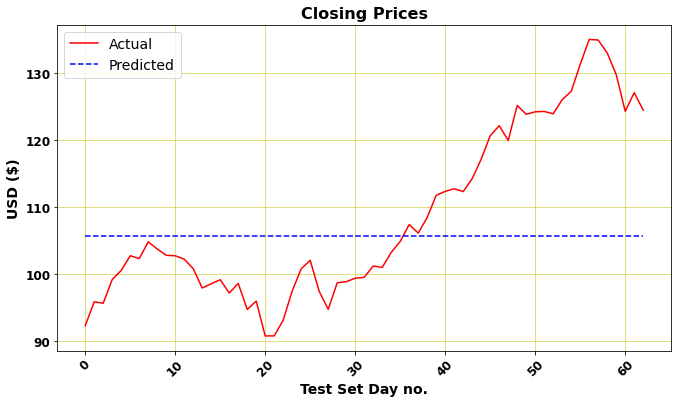

Mean Squared Error: 169.73948130278288
Mean Absolute Error: 10.623439448435953
R-squared score: -0.0531
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3055 - val_loss: 0.4260
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2702 - val_loss: 0.3813
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2386 - val_loss: 0.3421
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2108 - val_loss: 0.3081
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1872 - val_loss: 0.2785
Epoch 6/100
9/9 [==============================] - 0s 889us/step - loss: 0.1663 - val_loss: 0.2531
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1481 - val_loss: 0.2324
Epoch 8/100
9/9 [==============================] - 0s 889us/step - loss: 0.1321 - val_loss: 0.2165
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1186 - val_l

9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0787
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0786
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0784
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0783
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0782
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0780
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0779
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0778
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0777
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0776
Epoch 92/100
9/9 [==========

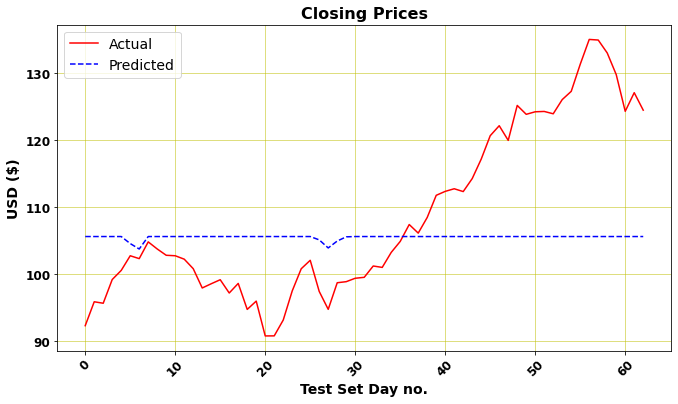

Mean Squared Error: 169.11440694558766
Mean Absolute Error: 10.520935747574097
R-squared score: -0.0492
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3227 - val_loss: 0.4538
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2784 - val_loss: 0.3936
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2371 - val_loss: 0.3376
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1843 - val_loss: 0.2774
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1313 - val_loss: 0.2097
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0880 - val_loss: 0.1561
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0561 - val_loss: 0.1180
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0346 - val_loss: 0.0916
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0223 - val_lo

9/9 [==============================] - 0s 1000us/step - loss: 0.0014 - val_loss: 0.0344
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 0.0013 - val_loss: 0.0343
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0343
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0343
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0013 - val_loss: 0.0343
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0343
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0342
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0342
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0341
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0341
Epoch 92/10

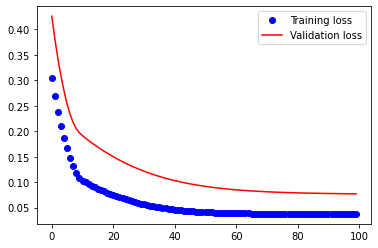

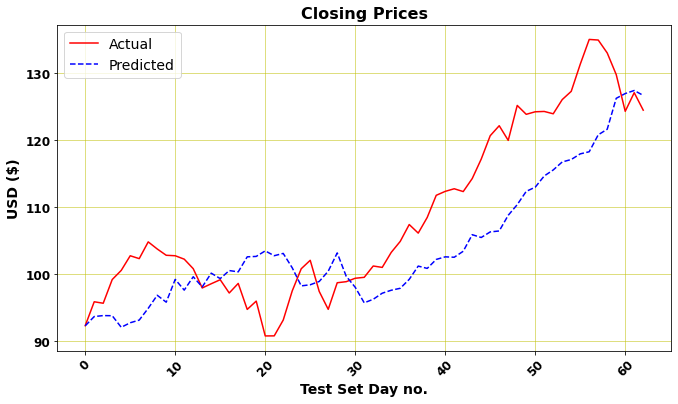

Mean Squared Error: 67.06138682452463
Mean Absolute Error: 6.90659650141059
R-squared score: 0.5839
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 6.4105e-04 - val_loss: 0.0151
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 4.0619e-04 - val_loss: 0.0150
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 3.6791e-04 - val_loss: 0.0150
Epoch 4/100
9/9 [==============================] - 0s 889us/step - loss: 3.5237e-04 - val_loss: 0.0150
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 3.5755e-04 - val_loss: 0.0150
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 3.4853e-04 - val_loss: 0.0150
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 3.4799e-04 - val_loss: 0.0150
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 3.4474e-04 - val_loss: 0.0150
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - 

9/9 [==============================] - 0s 1000us/step - loss: 2.9563e-04 - val_loss: 0.0146
Epoch 80/100
9/9 [==============================] - 0s 1ms/step - loss: 2.8497e-04 - val_loss: 0.0145
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 2.8225e-04 - val_loss: 0.0145
Epoch 82/100
9/9 [==============================] - 0s 1000us/step - loss: 2.8253e-04 - val_loss: 0.0145
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 2.7968e-04 - val_loss: 0.0145
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 2.8352e-04 - val_loss: 0.0146
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 2.8078e-04 - val_loss: 0.0146
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 2.8353e-04 - val_loss: 0.0144
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 2.8196e-04 - val_loss: 0.0144
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 2.8577e-

Mean Squared Error: 10.925301716011472
Mean Absolute Error: 2.730880594060018
R-squared score: 0.9322
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1489 - val_loss: 0.2251
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1429 - val_loss: 0.2026
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1336 - val_loss: 0.1741
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1099 - val_loss: 0.1393
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0806 - val_loss: 0.1067
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0548 - val_loss: 0.0804
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.0351 - val_loss: 0.0603
Epoch 8/100
9/9 [==============================] - 0s 889us/step - loss: 0.0212 - val_loss: 0.0477
Epoch 9/100
9/9 [==============================] - 0s 889us/step - loss: 0.0128 - val_l

9/9 [==============================] - 0s 889us/step - loss: 4.9918e-04 - val_loss: 0.0209
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 4.9323e-04 - val_loss: 0.0208
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 4.8835e-04 - val_loss: 0.0206
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 4.8614e-04 - val_loss: 0.0206
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 4.9854e-04 - val_loss: 0.0204
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 4.8536e-04 - val_loss: 0.0204
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 4.7721e-04 - val_loss: 0.0202
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 4.6962e-04 - val_loss: 0.0202
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6826e-04 - val_loss: 0.0201
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6421e

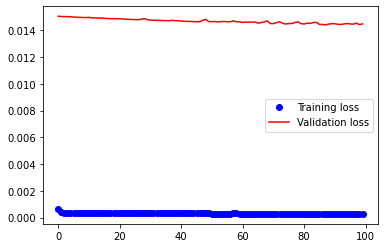

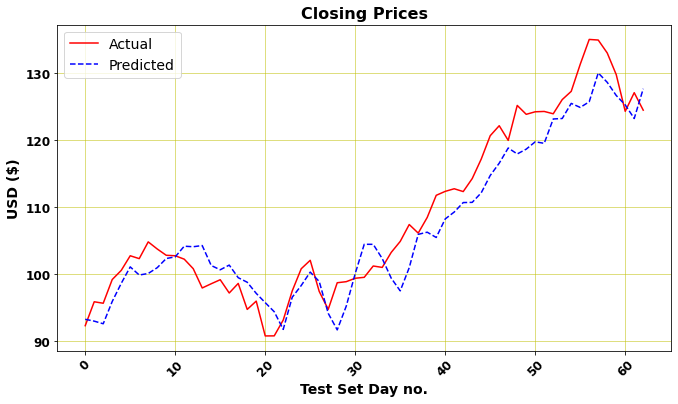

Mean Squared Error: 15.213182237668132
Mean Absolute Error: 3.3107304254324776
R-squared score: 0.9056
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 52ms/step - loss: 0.1489 - val_loss: 0.2468
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1429 - val_loss: 0.2375
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1369 - val_loss: 0.2239
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1294 - val_loss: 0.2054
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1044 - val_loss: 0.1829
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0535 - val_loss: 0.1499
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.1243
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.1103
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0716
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0035 - val_loss: 0.0714
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 0.0035 - val_loss: 0.0710
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0034 - val_loss: 0.0709
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0706
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0034 - val_loss: 0.0699
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0697
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0693
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0691
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0688
Epoch 93/10

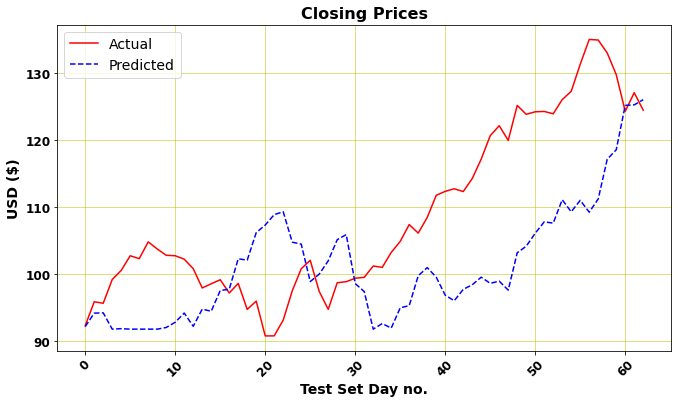

Mean Squared Error: 162.4440805800795
Mean Absolute Error: 10.743578958837118
R-squared score: -0.0078
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0876 - val_loss: 0.1596
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0485 - val_loss: 0.1329
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0229 - val_loss: 0.1197
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.1180
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.1212
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.1230
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 0.1221
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.1203
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.1188

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0808
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0804
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0801
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0035 - val_loss: 0.0795
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0790
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0034 - val_loss: 0.0788
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0783
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0780
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0775
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0769
Epoch 93/100
9

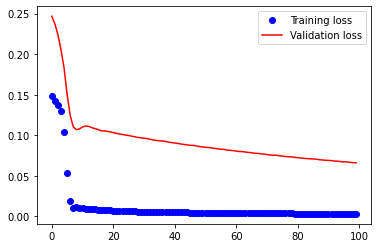

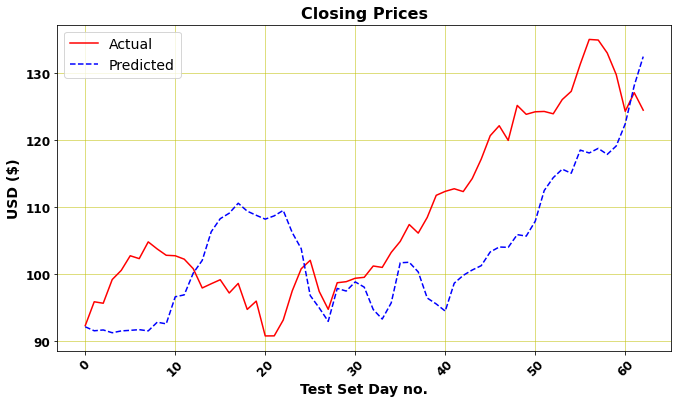

Mean Squared Error: 126.16144731617162
Mean Absolute Error: 9.742708107654389
R-squared score: 0.2173
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1790 - val_loss: 0.2920
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1653 - val_loss: 0.2730
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1533 - val_loss: 0.2568
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1429 - val_loss: 0.2429
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1341 - val_loss: 0.2307
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1264 - val_loss: 0.2201
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1197 - val_loss: 0.2107
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1136 - val_loss: 0.2023
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1082 - val_loss

9/9 [==============================] - 0s 1000us/step - loss: 0.0018 - val_loss: 0.0240
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0239
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0017 - val_loss: 0.0238
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0017 - val_loss: 0.0237
Epoch 86/100
9/9 [==============================] - 0s 889us/step - loss: 0.0016 - val_loss: 0.0237
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0236
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0235
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0235
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0234
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0014 - val_loss: 0.0233
Epoch 92/100
9

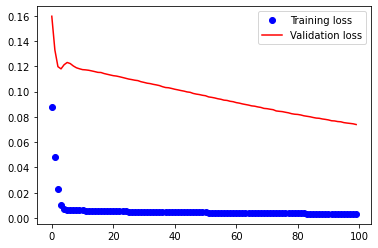

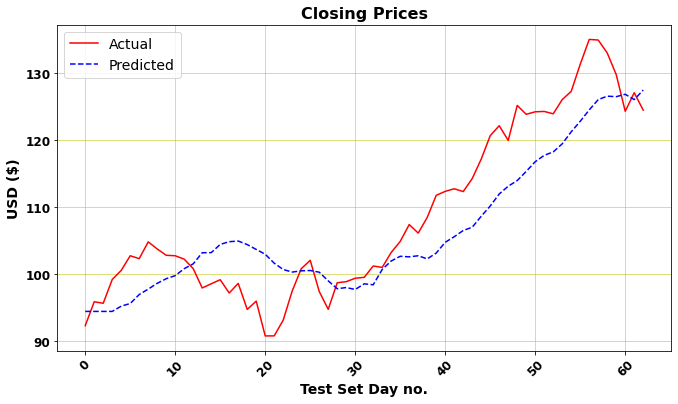

Mean Squared Error: 37.52305072934035
Mean Absolute Error: 5.2589807423890145
R-squared score: 0.7672
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3150 - val_loss: 0.4292
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2179 - val_loss: 0.3034
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1425 - val_loss: 0.2104
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0879 - val_loss: 0.1455
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0524 - val_loss: 0.1028
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0297 - val_loss: 0.0774
Epoch 7/100
9/9 [==============================] - 0s 999us/step - loss: 0.0163 - val_loss: 0.0711
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0552
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.050

Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 8.2592e-04 - val_loss: 0.0328
Epoch 82/100
9/9 [==============================] - 0s 1000us/step - loss: 8.1579e-04 - val_loss: 0.0327
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 8.1673e-04 - val_loss: 0.0327
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 8.2618e-04 - val_loss: 0.0327
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 8.3555e-04 - val_loss: 0.0325
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 8.1518e-04 - val_loss: 0.0325
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 8.1989e-04 - val_loss: 0.0325
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 8.1147e-04 - val_loss: 0.0324
Epoch 89/100
9/9 [==============================] - 0s 889us/step - loss: 7.9440e-04 - val_loss: 0.0323
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - lo

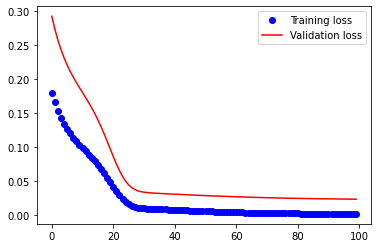

Mean Squared Error: 24.438920194280684
Mean Absolute Error: 3.9270709724159842
R-squared score: 0.8484
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2512
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2429
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1374 - val_loss: 0.2352
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2281
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2213
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2155
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1167 - val_loss: 0.2106
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2079
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1076 - val_

9/9 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0565
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0563
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0075 - val_loss: 0.0569
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0073 - val_loss: 0.0550
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0550
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0071 - val_loss: 0.0542
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0543
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0536
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 0.0067 - val_loss: 0.0532
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0528
Epoch 92/100
9/9 [====

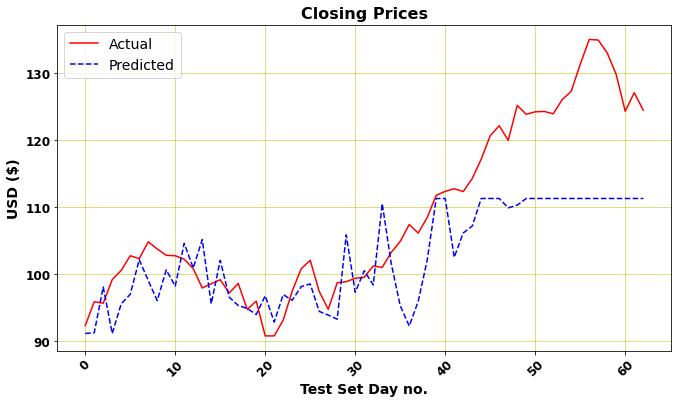

Mean Squared Error: 93.84599916023821
Mean Absolute Error: 7.470970021290612
R-squared score: 0.4178
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2152 - val_loss: 0.3183
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1716 - val_loss: 0.2733
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1415 - val_loss: 0.2471
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1325 - val_loss: 0.2340
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1275 - val_loss: 0.2256
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1226 - val_loss: 0.2186
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1180 - val_loss: 0.2121
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1135 - val_loss: 0.2060
Epoch 9/100
9/9 [==============================] - 0s 889us/step - loss: 0.1092 - val_loss: 0.2001

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0781
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0780
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0779
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0778
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0777
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0776
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0776
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0775
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0774
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0773
Epoch 92/100
9/9 [=======

Mean Squared Error: 169.71860620461277
Mean Absolute Error: 10.610454097842265
R-squared score: -0.053
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1852 - val_loss: 0.2623
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1386 - val_loss: 0.2022
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0999 - val_loss: 0.1536
Epoch 4/100
9/9 [==============================] - 0s 889us/step - loss: 0.0690 - val_loss: 0.1160
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0465 - val_loss: 0.0875
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0300 - val_loss: 0.0673
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0536
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0449
Epoch 9/100
9/9 [==============================] - 0s 889us/step - loss: 0.0080 - val

9/9 [==============================] - 0s 889us/step - loss: 0.0016 - val_loss: 0.0292
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0291
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0291
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0291
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0291
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0290
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0290
Epoch 89/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0289
Epoch 90/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0289
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0289
Epoch 92/100
9/9 [=

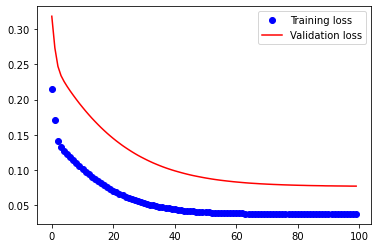

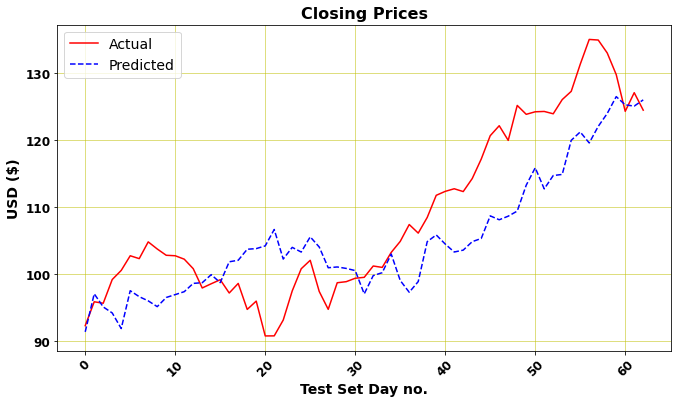

Mean Squared Error: 61.39802846409069
Mean Absolute Error: 6.540608953706288
R-squared score: 0.6191
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 1.1421 - val_loss: 1.4970
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.9496 - val_loss: 1.2421
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.7795 - val_loss: 1.0231
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6328 - val_loss: 0.8378
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.5118 - val_loss: 0.6814
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.4096 - val_loss: 0.5522
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.3259 - val_loss: 0.4463
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2574 - val_loss: 0.3607
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2035 - val

9/9 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0439
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0439
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0439
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0439
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0046 - val_loss: 0.0439
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 0.0045 - val_loss: 0.0438
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0044 - val_loss: 0.0438
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0438
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0438
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0042 - val_loss: 0.0438
Epoch 92/100
9/9 [====

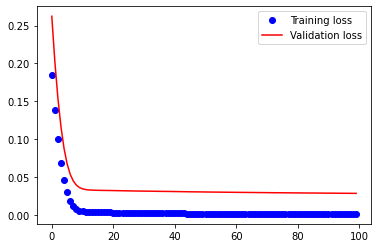

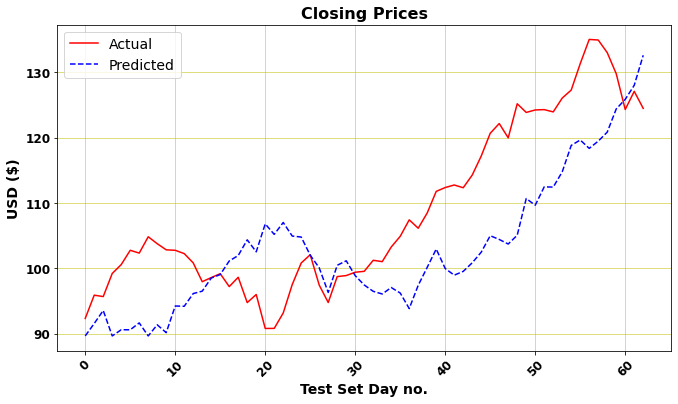

Mean Squared Error: 104.25940142666691
Mean Absolute Error: 8.71025111434307
R-squared score: 0.3532
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 48ms/step - loss: 0.3744 - val_loss: 0.4698
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2375 - val_loss: 0.3026
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1367 - val_loss: 0.1871
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0703 - val_loss: 0.1158
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0339 - val_loss: 0.0759
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0567
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0485
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0066 - val_loss: 0.0454
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0063 - val_loss

9/9 [==============================] - 0s 1000us/step - loss: 0.0027 - val_loss: 0.0333
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 0.0027 - val_loss: 0.0332
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0331
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0330
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0329
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0329
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0327
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0326
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0325
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0324
Epoch 92/100
9/9 [==========

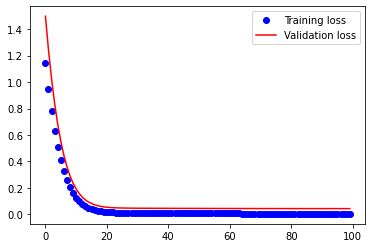

Mean Squared Error: 89.38859836785907
Mean Absolute Error: 8.339341038209945
R-squared score: 0.4454
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2330 - val_loss: 0.2682
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1615 - val_loss: 0.1851
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1069 - val_loss: 0.1257
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0679 - val_loss: 0.0856
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0423 - val_loss: 0.0599
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0256 - val_loss: 0.0445
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.0156 - val_loss: 0.0359
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0099 - val_loss: 0.0315
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068 - val_

9/9 [==============================] - 0s 889us/step - loss: 0.0012 - val_loss: 0.0272
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0272
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0272
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0272
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0012 - val_loss: 0.0272
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0272
Epoch 88/100
9/9 [==============================] - 0s 889us/step - loss: 0.0012 - val_loss: 0.0272
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0271
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0271
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0271
Epoch 92/100
9/9 [========

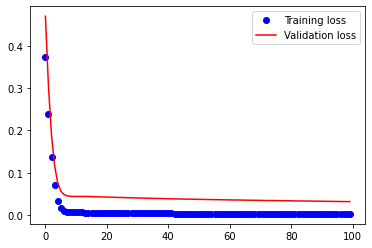

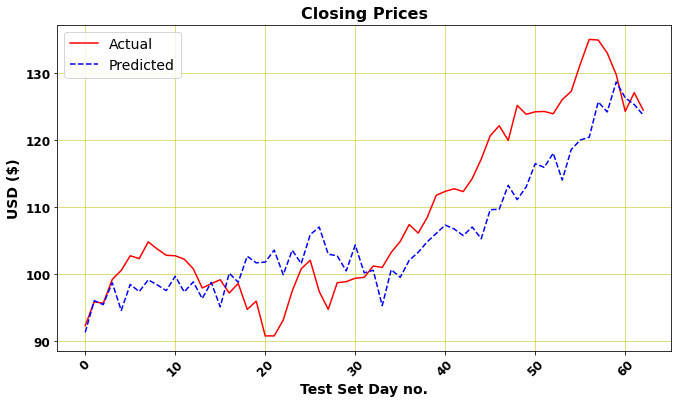

Mean Squared Error: 46.0211716165588
Mean Absolute Error: 5.589461544495598
R-squared score: 0.7145
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1076 - val_loss: 

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0766
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 93/100
9/9 

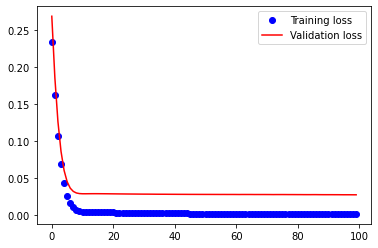

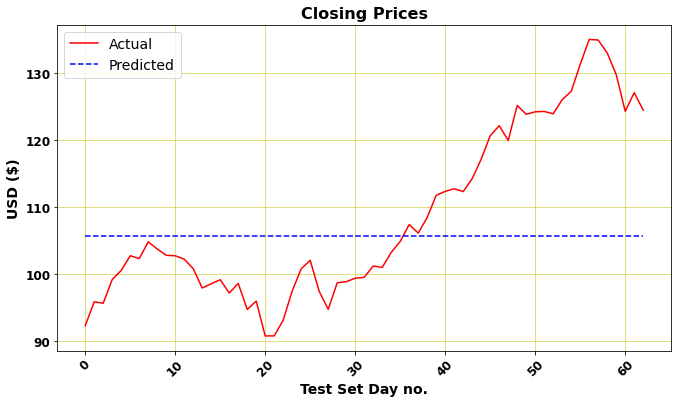

Mean Squared Error: 169.73961521964304
Mean Absolute Error: 10.623436178695439
R-squared score: -0.0531
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2412
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2203
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1347 - val_loss: 0.1866
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1032 - val_loss: 0.1363
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0641 - val_loss: 0.0880
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0345 - val_loss: 0.0543
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0356
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0271
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0046 - val_lo

9/9 [==============================] - 0s 1ms/step - loss: 6.3311e-04 - val_loss: 0.0201
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 6.3178e-04 - val_loss: 0.0201
Epoch 82/100
9/9 [==============================] - 0s 1000us/step - loss: 6.3121e-04 - val_loss: 0.0201
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 6.3081e-04 - val_loss: 0.0201
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 6.3015e-04 - val_loss: 0.0201
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 6.2822e-04 - val_loss: 0.0201
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 6.2757e-04 - val_loss: 0.0201
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 6.2691e-04 - val_loss: 0.0201
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 6.2647e-04 - val_loss: 0.0201
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 6.2522e-0

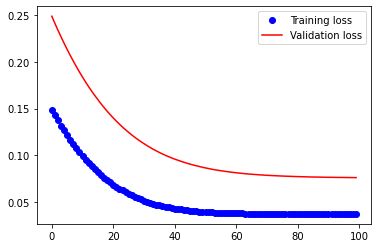

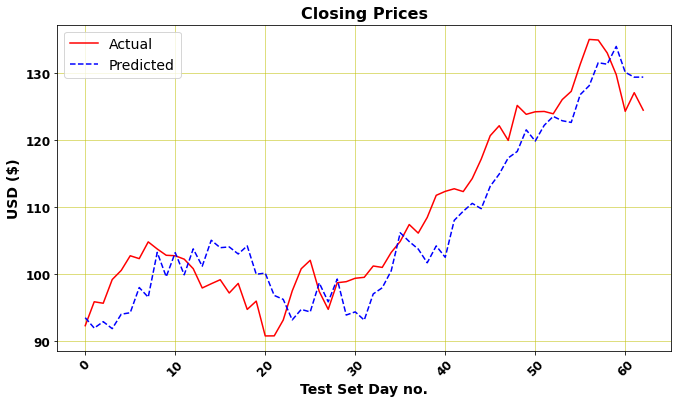

Mean Squared Error: 25.877491694111935
Mean Absolute Error: 4.469055770476811
R-squared score: 0.8395
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1962 - val_loss: 0.4141
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1304 - val_loss: 0.3142
Epoch 3/100
9/9 [==============================] - 0s 889us/step - loss: 0.0869 - val_loss: 0.2449
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0670 - val_loss: 0.2026
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0556 - val_loss: 0.1735
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0457 - val_loss: 0.1507
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.0369 - val_loss: 0.1315
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0290 - val_loss: 0.1148
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0226 - val_loss: 

9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0483
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0486
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0489
Epoch 85/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0011 - val_loss: 0.0494
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0499
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0505
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0508
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0509
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0511
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0517
Epoch 92/100
9/9 [============

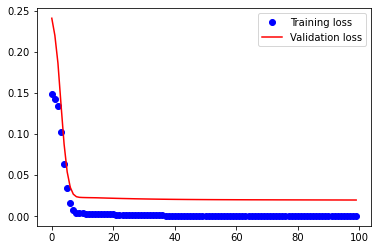

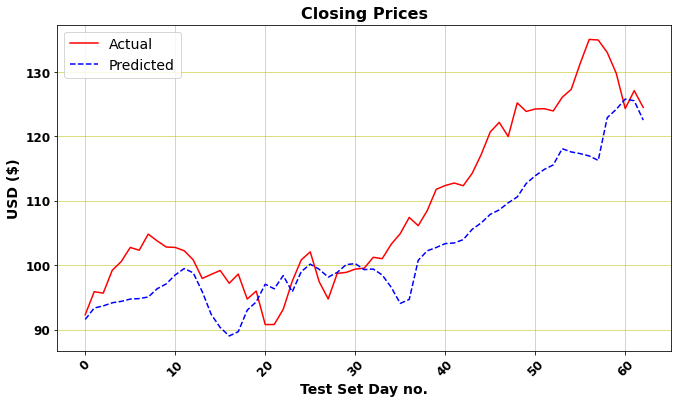

Mean Squared Error: 62.67065507765437
Mean Absolute Error: 6.5532520790705595
R-squared score: 0.6112
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2568
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2467
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2385
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1318 - val_loss: 0.2310
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.2239
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2171
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2106
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2043
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.19

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0763
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0761
Epoch 85/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0761
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0760
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0759
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0759
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0758
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0757
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0756
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0756
Epoch 93/100
9/

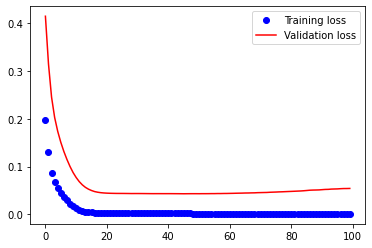

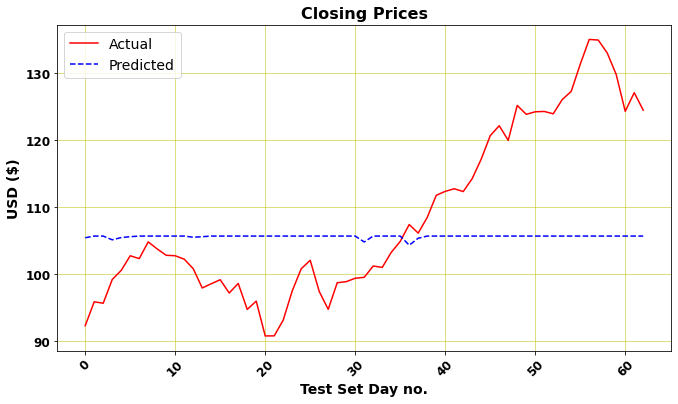

Mean Squared Error: 169.37830400812507
Mean Absolute Error: 10.613839490288631
R-squared score: -0.0509
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3879 - val_loss: 0.4999
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2490 - val_loss: 0.3317
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1587 - val_loss: 0.2215
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1008 - val_loss: 0.1517
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0626 - val_loss: 0.1068
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0373 - val_loss: 0.0791
Epoch 7/100
9/9 [==============================] - 0s 889us/step - loss: 0.0220 - val_loss: 0.0629
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0539
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0087 - v

9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0459
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0459
Epoch 84/100
9/9 [==============================] - 0s 889us/step - loss: 0.0013 - val_loss: 0.0460
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0460
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0013 - val_loss: 0.0460
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0460
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0460
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0460
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0460
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0460
Epoch 92/100
9/9 [=======

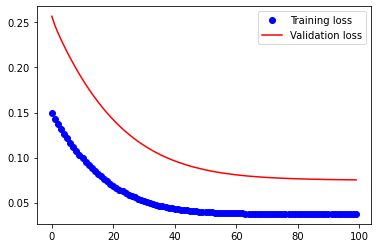

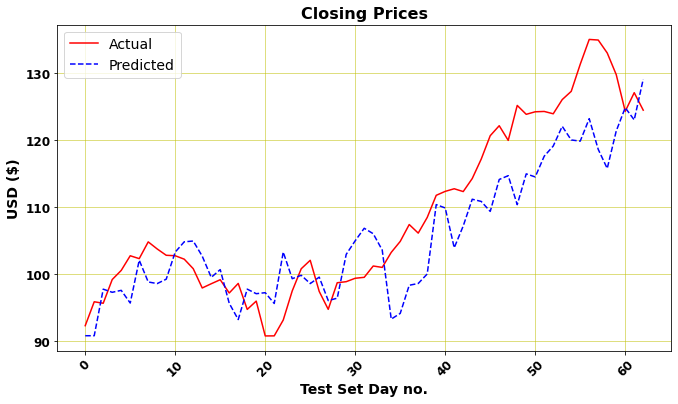

Mean Squared Error: 45.53336086262983
Mean Absolute Error: 5.510763727391803
R-squared score: 0.7175
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4955 - val_loss: 0.7606
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2768 - val_loss: 0.4787
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1344 - val_loss: 0.3039
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0653 - val_loss: 0.2088
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.1585
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0223 - val_loss: 0.1304
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0136 - val_loss: 0.1138
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.1039
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0065 - val_lo

Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0017 - val_loss: 0.0822
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0017 - val_loss: 0.0821
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0820
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0819
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0818
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0817
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0816
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0816
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0814
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0813
Epoch 93/100
9

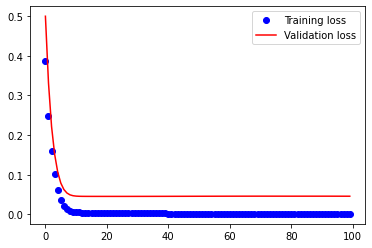

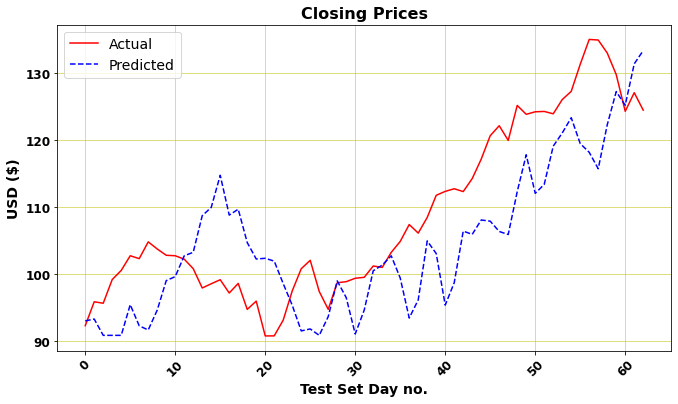

Mean Squared Error: 85.51238858673977
Mean Absolute Error: 7.884729509680369
R-squared score: 0.4695
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6288 - val_loss: 0.8970
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5548 - val_loss: 0.7961
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.4877 - val_loss: 0.7068
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4278 - val_loss: 0.6281
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3765 - val_loss: 0.5583
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3306 - val_loss: 0.4971
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2906 - val_loss: 0.4434
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2555 - val_loss: 0.3965
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2254 - val_loss:

9/9 [==============================] - 0s 1ms/step - loss: 0.0380 - val_loss: 0.0821
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0380 - val_loss: 0.0818
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0379 - val_loss: 0.0815
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.0812
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0378 - val_loss: 0.0810
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 0.0378 - val_loss: 0.0808
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0378 - val_loss: 0.0805
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0803
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0801
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0799
Epoch 92/100
9/9 [=======

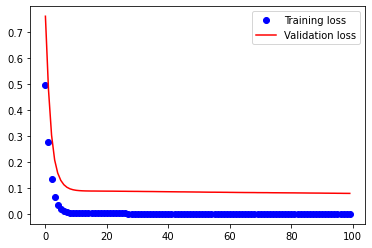

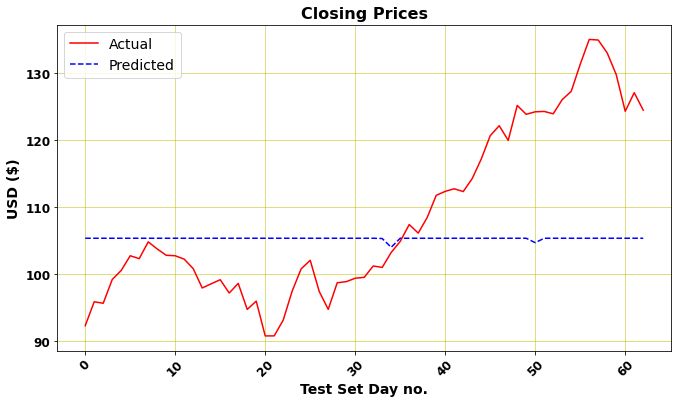

Mean Squared Error: 172.0792753882927
Mean Absolute Error: 10.565551356879343
R-squared score: -0.0676
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1431 - val_loss: 0.2411
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1318 - val_loss: 0.2267
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1266 - val_loss: 0.2198
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.2132
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2068
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1120 - val_loss: 0.2007
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1076 

9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0773
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0770
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0769
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0768
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 92/100
9/9 [============

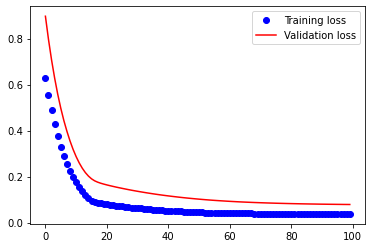

Mean Squared Error: 169.71260182471147
Mean Absolute Error: 10.622052836255273
R-squared score: -0.0529
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2673 - val_loss: 0.3631
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.2301 - val_loss: 0.3170
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1972 - val_loss: 0.2800
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1687 - val_loss: 0.2546
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1450 - val_loss: 0.2366
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1270 - val_loss: 0.2250
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1189 - val_loss: 0.2169
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1144 - val_loss: 0.2104
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1103 - val_lo

9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0798
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0797
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0795
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0794
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0793
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0792
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0791
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0790
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0789
Epoch 91/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0788
Epoch 92/100
9/9 [=============

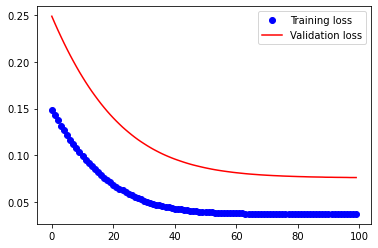

Mean Squared Error: 168.80809715521937
Mean Absolute Error: 10.562648796115454
R-squared score: -0.0473
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1258 - val_loss: 0.1905
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0886 - val_loss: 0.1517
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0572 - val_loss: 0.1162
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0339 - val_loss: 0.0880
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0664
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0531
Epoch 7/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0051 - val_loss: 0.0493
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0595
Epoch 9/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0019 - val_lo

Epoch 80/100
9/9 [==============================] - 0s 1000us/step - loss: 4.7421e-04 - val_loss: 0.0387
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6949e-04 - val_loss: 0.0384
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6630e-04 - val_loss: 0.0385
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 4.6717e-04 - val_loss: 0.0380
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 4.5843e-04 - val_loss: 0.0385
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 4.6278e-04 - val_loss: 0.0375
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 4.5833e-04 - val_loss: 0.0383
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 4.5426e-04 - val_loss: 0.0374
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 4.5169e-04 - val_loss: 0.0377
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 4.53

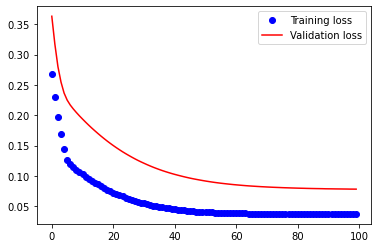

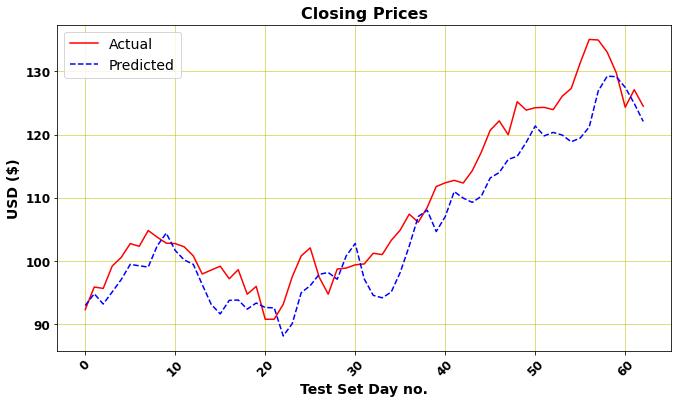

Mean Squared Error: 26.096153459030923
Mean Absolute Error: 4.2615313978484615
R-squared score: 0.8381
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2448
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2215
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1373 - val_loss: 0.1893
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1279 - val_loss: 0.1439
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0898 - val_loss: 0.0870
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0422 - val_loss: 0.0466
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0153 - val_loss: 0.0293
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.0275
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0291

9/9 [==============================] - 0s 1ms/step - loss: 5.7470e-04 - val_loss: 0.0221
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7532e-04 - val_loss: 0.0221
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7555e-04 - val_loss: 0.0220
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7536e-04 - val_loss: 0.0221
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7270e-04 - val_loss: 0.0220
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7321e-04 - val_loss: 0.0219
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7142e-04 - val_loss: 0.0220
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7114e-04 - val_loss: 0.0220
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7067e-04 - val_loss: 0.0220
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 5.7004e-04 - val_loss: 

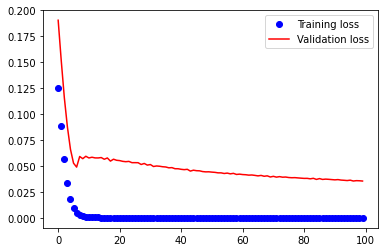

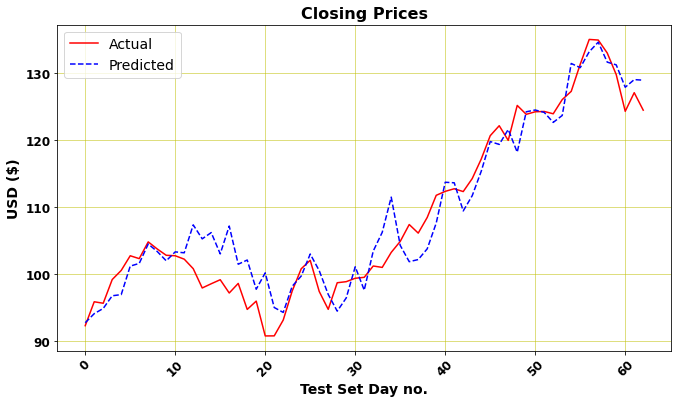

Mean Squared Error: 13.573913137200439
Mean Absolute Error: 2.7837275979507696
R-squared score: 0.9158
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1217 - val_loss: 0.2029
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1078 - val_loss: 0.1829
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0939 - val_loss: 0.1632
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0804 - val_loss: 0.1439
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0678 - val_loss: 0.1254
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0558 - val_loss: 0.1086
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0448 - val_loss: 0.0928
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0351 - val_loss: 0.0789
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0271 - val_loss: 0.0667

9/9 [==============================] - 0s 1ms/step - loss: 9.0848e-04 - val_loss: 0.0242
Epoch 81/100
9/9 [==============================] - 0s 1ms/step - loss: 9.0039e-04 - val_loss: 0.0242
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 8.9279e-04 - val_loss: 0.0242
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 8.8579e-04 - val_loss: 0.0241
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 8.8011e-04 - val_loss: 0.0241
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 8.7351e-04 - val_loss: 0.0241
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 8.6720e-04 - val_loss: 0.0241
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 8.6279e-04 - val_loss: 0.0241
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 8.5773e-04 - val_loss: 0.0240
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 8.5275e-04 - val_los

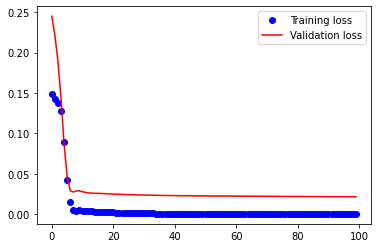

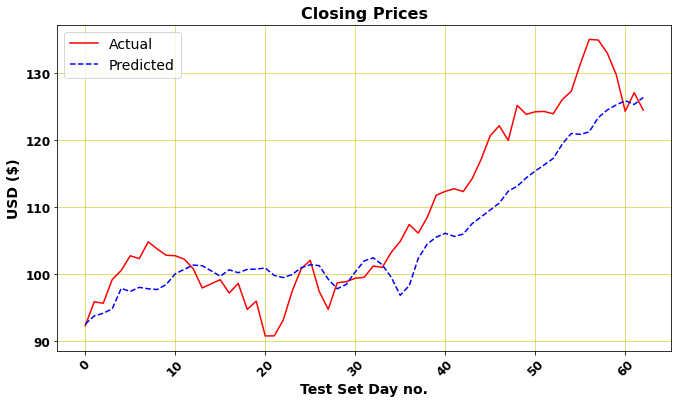

Mean Squared Error: 37.99872399361473
Mean Absolute Error: 5.078718467246404
R-squared score: 0.7642
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1417 - val_loss: 0.2034
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1100 - val_loss: 0.1648
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0779 - val_loss: 0.1247
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0516 - val_loss: 0.0915
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0325 - val_loss: 0.0664
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0494
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0389
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0330
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0298
E

Epoch 79/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5703e-04 - val_loss: 0.0237
Epoch 80/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5588e-04 - val_loss: 0.0237
Epoch 81/100
9/9 [==============================] - 0s 889us/step - loss: 5.5529e-04 - val_loss: 0.0237
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5400e-04 - val_loss: 0.0236
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 5.5315e-04 - val_loss: 0.0236
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 5.5365e-04 - val_loss: 0.0236
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5162e-04 - val_loss: 0.0236
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 5.5120e-04 - val_loss: 0.0236
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 5.5059e-04 - val_loss: 0.0236
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - l

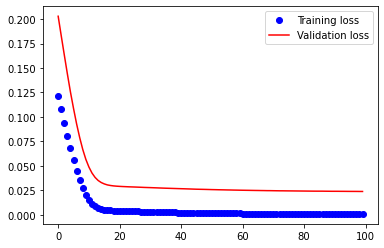

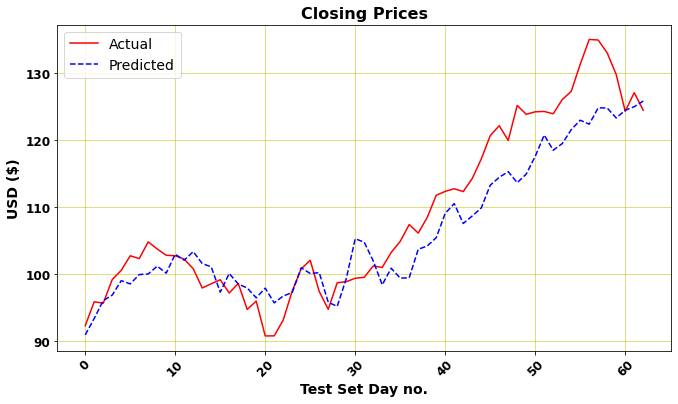

Mean Squared Error: 24.633255488813163
Mean Absolute Error: 4.0029250554548
R-squared score: 0.8472
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1490 - val_loss: 0.2487
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.2412
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1374 - val_loss: 0.2338
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.2268
Epoch 5/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1266 - val_loss: 0.2199
Epoch 6/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1215 - val_loss: 0.2133
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.2069
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1120 - val_loss: 0.2008
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1076 - val_loss: 0.1

Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0772
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0771
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0770
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0769
Epoch 87/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0768
Epoch 88/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0768
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0767
Epoch 90/100
9/9 [==============================] - 0s 889us/step - loss: 0.0375 - val_loss: 0.0766
Epoch 91/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0375 - val_loss: 0.0766
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0766
Epoch 9

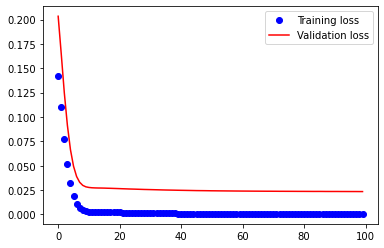

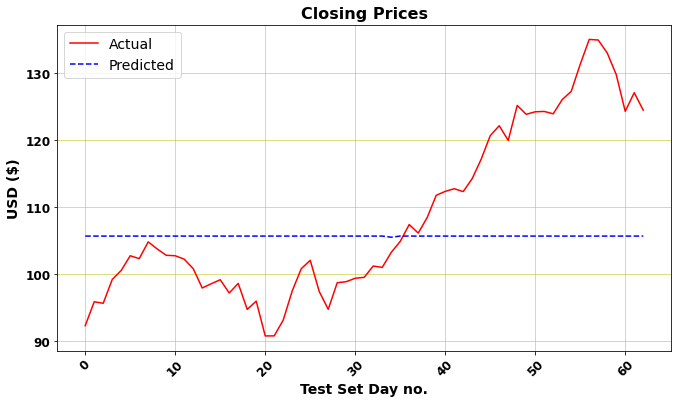

Mean Squared Error: 169.72686393104985
Mean Absolute Error: 10.620725442708336
R-squared score: -0.053
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1492 - val_loss: 0.2535
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1429 - val_loss: 0.2397
Epoch 3/100
9/9 [==============================] - 0s 1000us/step - loss: 0.1359 - val_loss: 0.2232
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1188 - val_loss: 0.1967
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0883 - val_loss: 0.1618
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0596 - val_loss: 0.1266
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0972
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0748
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0

9/9 [==============================] - 0s 1000us/step - loss: 4.4674e-04 - val_loss: 0.0351
Epoch 82/100
9/9 [==============================] - 0s 1ms/step - loss: 4.5152e-04 - val_loss: 0.0361
Epoch 83/100
9/9 [==============================] - 0s 1000us/step - loss: 4.3601e-04 - val_loss: 0.0359
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 4.3026e-04 - val_loss: 0.0357
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 4.2459e-04 - val_loss: 0.0354
Epoch 86/100
9/9 [==============================] - 0s 1ms/step - loss: 4.1991e-04 - val_loss: 0.0355
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 4.1832e-04 - val_loss: 0.0353
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 4.1594e-04 - val_loss: 0.0355
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 4.2015e-04 - val_loss: 0.0354
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 4.1643e-04 - val_

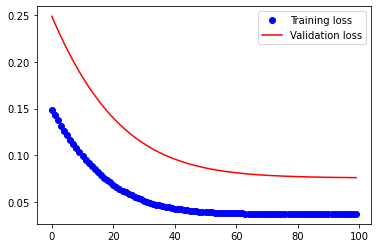

Mean Squared Error: 23.615410744879615
Mean Absolute Error: 3.934042920743427
R-squared score: 0.8535
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0505 - val_loss: 0.0850
Epoch 2/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0210 - val_loss: 0.0545
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0428
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0406
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0406
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0405
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0405
Epoch 8/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0025 - val_loss: 0.0406
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0

9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0359
Epoch 83/100
9/9 [==============================] - 0s 889us/step - loss: 0.0015 - val_loss: 0.0358
Epoch 84/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0357
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0357
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0015 - val_loss: 0.0356
Epoch 87/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0355
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0354
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0354
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0353
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0352
Epoch 92/100
9/9 [=======

Mean Squared Error: 47.82146674681749
Mean Absolute Error: 6.067184931524368
R-squared score: 0.7033
[INFO] training model...
Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4026 - val_loss: 0.6123
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3624 - val_loss: 0.5565
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3260 - val_loss: 0.5071
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2935 - val_loss: 0.4636
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2657 - val_loss: 0.4250
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2407 - val_loss: 0.3910
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.2189 - val_loss: 0.3611
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1997 - val_loss: 0.3348
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1831 - val_loss: 0.3112
E

9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0814
Epoch 83/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0812
Epoch 84/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0810
Epoch 85/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0808
Epoch 86/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0376 - val_loss: 0.0807
Epoch 87/100
9/9 [==============================] - 0s 1000us/step - loss: 0.0376 - val_loss: 0.0805
Epoch 88/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0804
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0802
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0800
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0799
Epoch 92/100
9/9 [=========

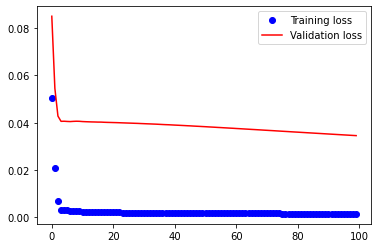

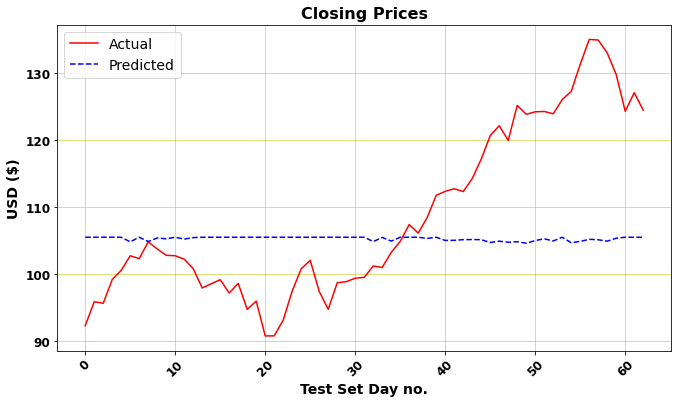

Mean Squared Error: 176.2505730722594
Mean Absolute Error: 10.70563866621714
R-squared score: -0.0935


(99.35398385563221, 7.63641932260208, 0.383588417866431)

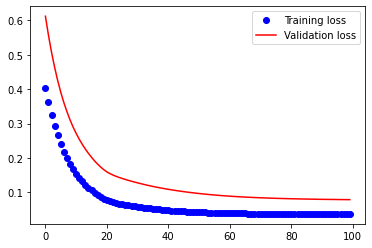

In [484]:
baseline_test(100, input_dim, X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_rescaled, scaler)




In [486]:
# wrap our model into a scikit-learn compatible classifier
print("[INFO] initializing model...")
model = KerasRegressor(build_fn=get_mlp_model, verbose=0, input_dim=input_dim)
# define a grid of the hyperparameter search space
hidden_layer_one = [25, 50, 100]
hidden_layer_two = [5, 10, 25]
learn_rate = [0.01, 0.001, 0.0001]
dropout = [0.1, 0.2 , 0.3, 0.4, 0.5]
batch_size = [4, 8, 16, 32, 64, 128]
epochs = [10, 50, 100, 500, 1000]
# create a dictionary from the hyperparameter grid
grid = dict(
    hidden_layer_one=hidden_layer_one,
    hidden_layer_two=hidden_layer_two,
    dropout=dropout,
    learn_rate=learn_rate,
    batch_size=batch_size,
    epochs=epochs
)


[INFO] initializing model...


[INFO] performing random search...
[INFO] best score is 0.10 using {'learn_rate': 0.001, 'hidden_layer_two': 5, 'hidden_layer_one': 25, 'epochs': 50, 'dropout': 0.1, 'batch_size': 4}
[INFO] training model...
Epoch 1/50
281/281 [==============================] - 0s 644us/step - loss: 0.0473 - mse: 0.0473 - mae: 0.1322 - val_loss: 0.0315 - val_mse: 0.0315 - val_mae: 0.1410
Epoch 2/50
281/281 [==============================] - 0s 409us/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0679 - val_loss: 0.0289 - val_mse: 0.0289 - val_mae: 0.1354
Epoch 3/50
281/281 [==============================] - 0s 427us/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0666 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1339
Epoch 4/50
281/281 [==============================] - 0s 409us/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0633 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.1279
Epoch 5/50
281/281 [==============================] - 0s 416us/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0591 - val_loss: 0.025

Epoch 49/50
281/281 [==============================] - 0s 416us/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0365 - val_loss: 0.0181 - val_mse: 0.0181 - val_mae: 0.1094
Epoch 50/50
281/281 [==============================] - 0s 416us/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0347 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1103


Mean Squared Error: 19.5205163792889
Mean Absolute Error: 3.6156681142965663
R-squared score: 0.8789
[INFO] performing random search...
[INFO] best score is 0.55 using {'learn_rate': 0.001, 'hidden_layer_two': 25, 'hidden_layer_one': 50, 'epochs': 10, 'dropout': 0.3, 'batch_size': 128}
[INFO] training model...
Epoch 1/10
9/9 [==============================] - 0s 9ms/step - loss: 0.3139 - mse: 0.3139 - mae: 0.4337 - val_loss: 0.1278 - val_mse: 0.1278 - val_mae: 0.2871
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0838 - mse: 0.0838 - mae: 0.2001 - val_loss: 0.0365 - val_mse: 0.0365 - val_mae: 0.1540
Epoch 3/10
9/9 [==============================] - 0s 1ms/step - loss: 0.0506 - mse: 0.0506 - mae: 0.1656 - val_loss: 0.0345 - val_mse: 0.0345 - val_mae: 0.1412
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1434 - val_loss: 0.0320 - val_mse: 0.0320 - val_mae: 0.1484
Epoch 5/10
9/9 [==============================] 

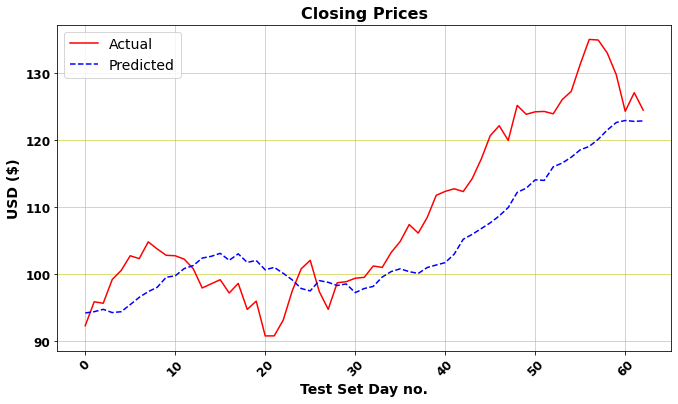

Mean Squared Error: 55.89648410828804
Mean Absolute Error: 6.306191207558285
R-squared score: 0.6532
[INFO] performing random search...
[INFO] best score is 0.82 using {'learn_rate': 0.0001, 'hidden_layer_two': 25, 'hidden_layer_one': 100, 'epochs': 10, 'dropout': 0.1, 'batch_size': 4}
[INFO] training model...
Epoch 1/10
281/281 [==============================] - 1s 2ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0781 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1547
Epoch 2/10
281/281 [==============================] - 0s 427us/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0618 - val_loss: 0.0303 - val_mse: 0.0303 - val_mae: 0.1435
Epoch 3/10
281/281 [==============================] - 0s 434us/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0505 - val_loss: 0.0282 - val_mse: 0.0282 - val_mae: 0.1422
Epoch 4/10
281/281 [==============================] - 0s 438us/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0481 - val_loss: 0.0259 - val_mse: 0.0259 - val_mae: 0.1366
Epoch 5/10
281/281 [======

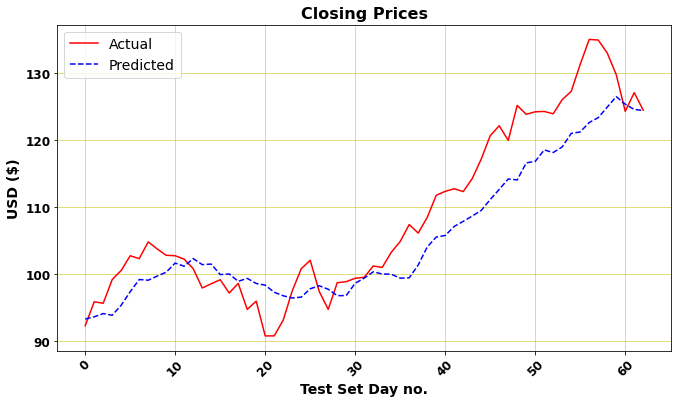

Mean Squared Error: 29.120067936926848
Mean Absolute Error: 4.470772371272012
R-squared score: 0.8193
[INFO] performing random search...
[INFO] best score is 0.61 using {'learn_rate': 0.001, 'hidden_layer_two': 10, 'hidden_layer_one': 50, 'epochs': 10, 'dropout': 0.2, 'batch_size': 64}
[INFO] training model...
Epoch 1/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0837 - mse: 0.0837 - mae: 0.2290 - val_loss: 0.0527 - val_mse: 0.0527 - val_mae: 0.1809
Epoch 2/10
18/18 [==============================] - 0s 833us/step - loss: 0.0225 - mse: 0.0225 - mae: 0.1121 - val_loss: 0.0299 - val_mse: 0.0299 - val_mae: 0.1377
Epoch 3/10
18/18 [==============================] - 0s 778us/step - loss: 0.0186 - mse: 0.0186 - mae: 0.0986 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1557
Epoch 4/10
18/18 [==============================] - 0s 778us/step - loss: 0.0168 - mse: 0.0168 - mae: 0.0922 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1498
Epoch 5/10
18/18 [================

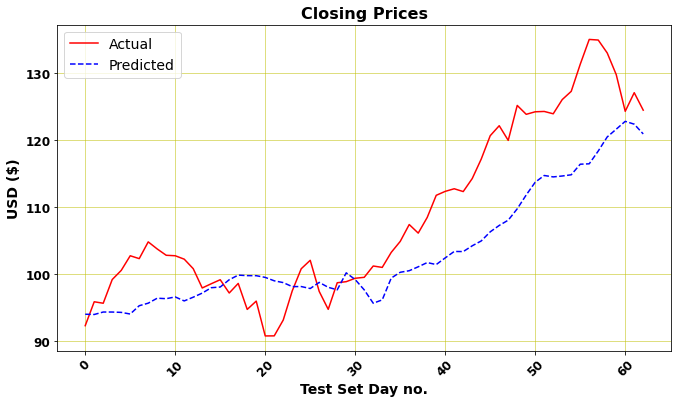

Mean Squared Error: 66.66168068880634
Mean Absolute Error: 6.759083102221292
R-squared score: 0.5864
[INFO] performing random search...
[INFO] best score is 0.60 using {'learn_rate': 0.001, 'hidden_layer_two': 5, 'hidden_layer_one': 50, 'epochs': 10, 'dropout': 0.1, 'batch_size': 32}
[INFO] training model...
Epoch 1/10
36/36 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0949 - val_loss: 0.0230 - val_mse: 0.0230 - val_mae: 0.1201
Epoch 2/10
36/36 [==============================] - 0s 611us/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0778 - val_loss: 0.0215 - val_mse: 0.0215 - val_mae: 0.1174
Epoch 3/10
36/36 [==============================] - 0s 583us/step - loss: 0.0107 - mse: 0.0107 - mae: 0.0725 - val_loss: 0.0221 - val_mse: 0.0221 - val_mae: 0.1200
Epoch 4/10
36/36 [==============================] - 0s 611us/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0676 - val_loss: 0.0178 - val_mse: 0.0178 - val_mae: 0.1072
Epoch 5/10
36/36 [==================

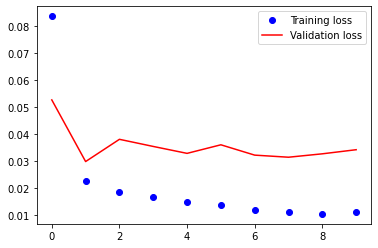

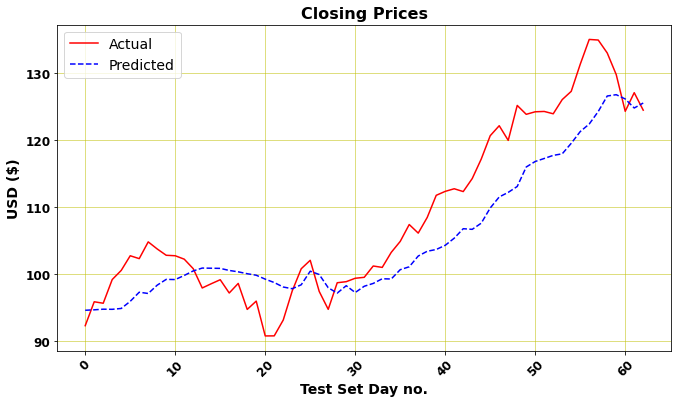

Mean Squared Error: 35.002819797403404
Mean Absolute Error: 4.996798057903956
R-squared score: 0.7828
[INFO] performing random search...
[INFO] best score is 0.02 using {'learn_rate': 0.001, 'hidden_layer_two': 25, 'hidden_layer_one': 25, 'epochs': 100, 'dropout': 0.1, 'batch_size': 64}
[INFO] training model...
Epoch 1/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0914 - mse: 0.0914 - mae: 0.2301 - val_loss: 0.0505 - val_mse: 0.0505 - val_mae: 0.1788
Epoch 2/100
18/18 [==============================] - 0s 833us/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0821 - val_loss: 0.0274 - val_mse: 0.0274 - val_mae: 0.1364
Epoch 3/100
18/18 [==============================] - 0s 778us/step - loss: 0.0107 - mse: 0.0107 - mae: 0.0796 - val_loss: 0.0283 - val_mse: 0.0283 - val_mae: 0.1364
Epoch 4/100
18/18 [==============================] - 0s 833us/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0664 - val_loss: 0.0264 - val_mse: 0.0264 - val_mae: 0.1324
Epoch 5/100
18/18 [==========

18/18 [==============================] - 0s 889us/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0344 - val_loss: 0.0188 - val_mse: 0.0188 - val_mae: 0.1123
Epoch 49/100
18/18 [==============================] - 0s 833us/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0325 - val_loss: 0.0193 - val_mse: 0.0193 - val_mae: 0.1137
Epoch 50/100
18/18 [==============================] - 0s 833us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0307 - val_loss: 0.0179 - val_mse: 0.0179 - val_mae: 0.1096
Epoch 51/100
18/18 [==============================] - 0s 833us/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0298 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.1142
Epoch 52/100
18/18 [==============================] - 0s 778us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0302 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.1129
Epoch 53/100
18/18 [==============================] - 0s 778us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0310 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.1141
Epoch 54/100
18/1

18/18 [==============================] - 0s 833us/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0279 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.1105
Epoch 98/100
18/18 [==============================] - 0s 833us/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0256 - val_loss: 0.0173 - val_mse: 0.0173 - val_mae: 0.1074
Epoch 99/100
18/18 [==============================] - 0s 833us/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0279 - val_loss: 0.0176 - val_mse: 0.0176 - val_mae: 0.1079
Epoch 100/100
18/18 [==============================] - 0s 833us/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0286 - val_loss: 0.0189 - val_mse: 0.0189 - val_mae: 0.1122


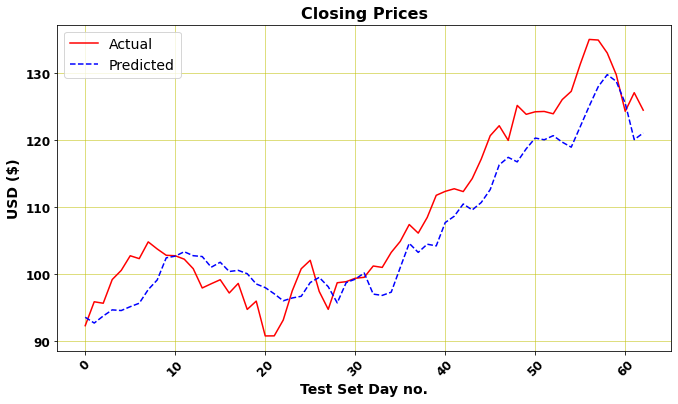

Mean Squared Error: 22.760758748840438
Mean Absolute Error: 4.107985333813865
R-squared score: 0.8588
[INFO] performing random search...
[INFO] best score is 0.26 using {'learn_rate': 0.0001, 'hidden_layer_two': 10, 'hidden_layer_one': 50, 'epochs': 50, 'dropout': 0.2, 'batch_size': 128}
[INFO] training model...
Epoch 1/50
9/9 [==============================] - 0s 8ms/step - loss: 0.3262 - mse: 0.3262 - mae: 0.4812 - val_loss: 0.4959 - val_mse: 0.4959 - val_mae: 0.6225
Epoch 2/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2902 - mse: 0.2902 - mae: 0.4536 - val_loss: 0.4434 - val_mse: 0.4434 - val_mae: 0.5855
Epoch 3/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2667 - mse: 0.2667 - mae: 0.4291 - val_loss: 0.3927 - val_mse: 0.3927 - val_mae: 0.5474
Epoch 4/50
9/9 [==============================] - 0s 1ms/step - loss: 0.2381 - mse: 0.2381 - mae: 0.4038 - val_loss: 0.3441 - val_mse: 0.3441 - val_mae: 0.5081
Epoch 5/50
9/9 [==============================

Epoch 50/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.1170 - val_loss: 0.0321 - val_mse: 0.0321 - val_mae: 0.1481


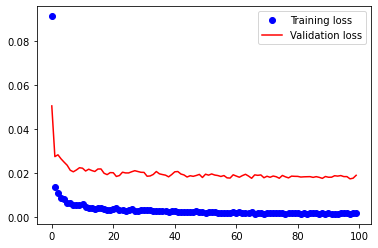

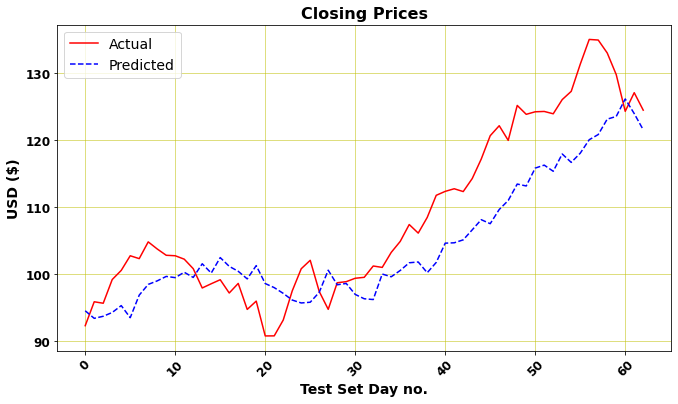

Mean Squared Error: 47.81947813637093
Mean Absolute Error: 5.864112583689857
R-squared score: 0.7033
[INFO] performing random search...
[INFO] best score is 0.33 using {'learn_rate': 0.001, 'hidden_layer_two': 25, 'hidden_layer_one': 25, 'epochs': 10, 'dropout': 0.1, 'batch_size': 16}
[INFO] training model...
Epoch 1/10
71/71 [==============================] - 0s 1ms/step - loss: 0.0213 - mse: 0.0213 - mae: 0.0955 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1263
Epoch 2/10
71/71 [==============================] - 0s 493us/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0561 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.1389
Epoch 3/10
71/71 [==============================] - 0s 465us/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0481 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1362
Epoch 4/10
71/71 [==============================] - 0s 479us/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0435 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.1304
Epoch 5/10
71/71 [=================

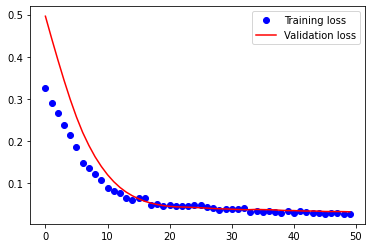

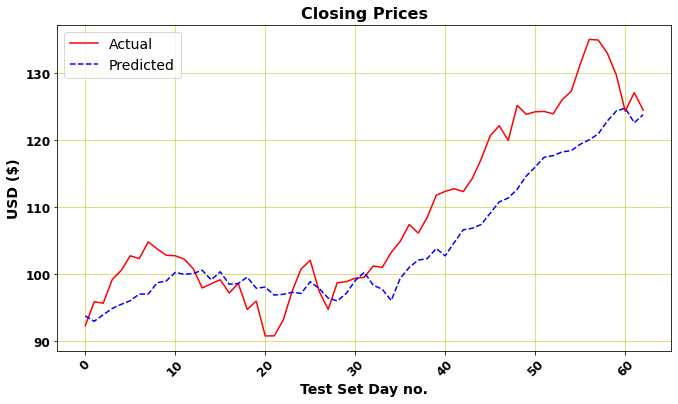

Mean Squared Error: 41.44508993045661
Mean Absolute Error: 5.259496508316282
R-squared score: 0.7429
[INFO] performing random search...
[INFO] best score is 0.29 using {'learn_rate': 0.0001, 'hidden_layer_two': 10, 'hidden_layer_one': 25, 'epochs': 50, 'dropout': 0.1, 'batch_size': 32}
[INFO] training model...
Epoch 1/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3615 - mse: 0.3615 - mae: 0.5040 - val_loss: 0.4391 - val_mse: 0.4391 - val_mae: 0.5781
Epoch 2/50
36/36 [==============================] - 0s 667us/step - loss: 0.2565 - mse: 0.2565 - mae: 0.4151 - val_loss: 0.3008 - val_mse: 0.3008 - val_mae: 0.4667
Epoch 3/50
36/36 [==============================] - 0s 667us/step - loss: 0.1671 - mse: 0.1671 - mae: 0.3278 - val_loss: 0.2115 - val_mse: 0.2115 - val_mae: 0.3806
Epoch 4/50
36/36 [==============================] - 0s 639us/step - loss: 0.1188 - mse: 0.1188 - mae: 0.2692 - val_loss: 0.1521 - val_mse: 0.1521 - val_mae: 0.3154
Epoch 5/50
36/36 [================

Epoch 49/50
36/36 [==============================] - 0s 639us/step - loss: 0.0183 - mse: 0.0183 - mae: 0.0779 - val_loss: 0.0313 - val_mse: 0.0313 - val_mae: 0.1457
Epoch 50/50
36/36 [==============================] - 0s 639us/step - loss: 0.0163 - mse: 0.0163 - mae: 0.0751 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1471


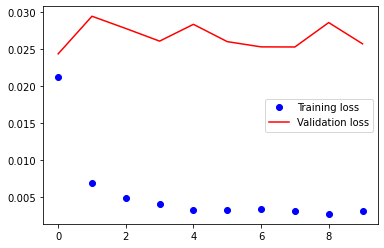

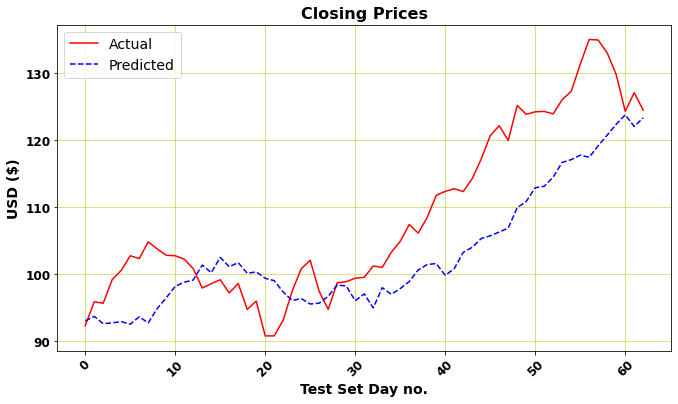

Mean Squared Error: 71.74197000038282
Mean Absolute Error: 7.167432736335876
R-squared score: 0.5549
[INFO] performing random search...
[INFO] best score is 0.57 using {'learn_rate': 0.0001, 'hidden_layer_two': 25, 'hidden_layer_one': 25, 'epochs': 500, 'dropout': 0.1, 'batch_size': 128}
[INFO] training model...
Epoch 1/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1376 - mse: 0.1376 - mae: 0.2910 - val_loss: 0.1626 - val_mse: 0.1626 - val_mae: 0.3536
Epoch 2/500
9/9 [==============================] - 0s 2ms/step - loss: 0.1080 - mse: 0.1080 - mae: 0.2494 - val_loss: 0.1198 - val_mse: 0.1198 - val_mae: 0.2979
Epoch 3/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0829 - mse: 0.0829 - mae: 0.2114 - val_loss: 0.0855 - val_mse: 0.0855 - val_mae: 0.2458
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0632 - mse: 0.0632 - mae: 0.1788 - val_loss: 0.0595 - val_mse: 0.0595 - val_mae: 0.2019
Epoch 5/500
9/9 [=========================

Epoch 50/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0862 - val_loss: 0.0229 - val_mse: 0.0229 - val_mae: 0.1171
Epoch 51/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0166 - mse: 0.0166 - mae: 0.0857 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1174
Epoch 52/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0798 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1175
Epoch 53/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0800 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1176
Epoch 54/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0862 - val_loss: 0.0231 - val_mse: 0.0231 - val_mae: 0.1179
Epoch 55/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0813 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.1185
Epoch 56/500
9/9 [==========

9/9 [==============================] - 0s 1ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0641 - val_loss: 0.0276 - val_mse: 0.0276 - val_mae: 0.1307
Epoch 101/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0607 - val_loss: 0.0275 - val_mse: 0.0275 - val_mae: 0.1309
Epoch 102/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0629 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.1311
Epoch 103/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0614 - val_loss: 0.0278 - val_mse: 0.0278 - val_mae: 0.1313
Epoch 104/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0612 - val_loss: 0.0277 - val_mse: 0.0277 - val_mae: 0.1314
Epoch 105/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0620 - val_loss: 0.0279 - val_mse: 0.0279 - val_mae: 0.1314
Epoch 106/500
9/9 [=================

9/9 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0482 - val_loss: 0.0271 - val_mse: 0.0271 - val_mae: 0.1315
Epoch 151/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0479 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.1314
Epoch 152/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0490 - val_loss: 0.0268 - val_mse: 0.0268 - val_mae: 0.1312
Epoch 153/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0505 - val_loss: 0.0266 - val_mse: 0.0266 - val_mae: 0.1310
Epoch 154/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0506 - val_loss: 0.0267 - val_mse: 0.0267 - val_mae: 0.1311
Epoch 155/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0472 - val_loss: 0.0267 - val_mse: 0.0267 - val_mae: 0.1311
Epoch 156/500
9/9 [=================

9/9 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0452 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1296
Epoch 201/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0448 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1300
Epoch 202/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0444 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1299
Epoch 203/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0436 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1298
Epoch 204/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0433 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1300
Epoch 205/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0432 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1302
Epoch 206/500
9/9 [=================

9/9 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0409 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.1307
Epoch 251/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0416 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.1306
Epoch 252/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0395 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1309
Epoch 253/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0396 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1310
Epoch 254/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0381 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1310
Epoch 255/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0421 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1303
Epoch 256/500
9/9 [=================

9/9 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0371 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.1318
Epoch 301/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0365 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1315
Epoch 302/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0375 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1316
Epoch 303/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0362 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1316
Epoch 304/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0359 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1311
Epoch 305/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0376 - val_loss: 0.0251 - val_mse: 0.0251 - val_mae: 0.1315
Epoch 306/500
9/9 [=================

9/9 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0346 - val_loss: 0.0255 - val_mse: 0.0255 - val_mae: 0.1328
Epoch 351/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0337 - val_loss: 0.0256 - val_mse: 0.0256 - val_mae: 0.1332
Epoch 352/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0350 - val_loss: 0.0256 - val_mse: 0.0256 - val_mae: 0.1330
Epoch 353/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0344 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.1320
Epoch 354/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0344 - val_loss: 0.0253 - val_mse: 0.0253 - val_mae: 0.1321
Epoch 355/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0354 - val_loss: 0.0254 - val_mse: 0.0254 - val_mae: 0.1324
Epoch 356/500
9/9 [=================

9/9 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0352 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1317
Epoch 401/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0346 - val_loss: 0.0249 - val_mse: 0.0249 - val_mae: 0.1309
Epoch 402/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0340 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1315
Epoch 403/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0341 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.1320
Epoch 404/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0350 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1317
Epoch 405/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0319 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1313
Epoch 406/500
9/9 [=================

9/9 [==============================] - 0s 2ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0325 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1297
Epoch 451/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0327 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1299
Epoch 452/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0311 - val_loss: 0.0248 - val_mse: 0.0248 - val_mae: 0.1312
Epoch 453/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0332 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.1308
Epoch 454/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0322 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.1307
Epoch 455/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0325 - val_loss: 0.0246 - val_mse: 0.0246 - val_mae: 0.1302
Epoch 456/500
9/9 [=================

9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0309 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1288


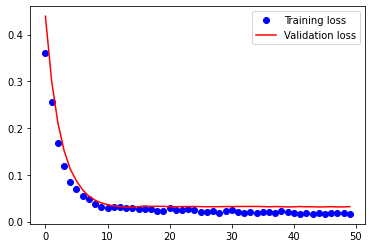

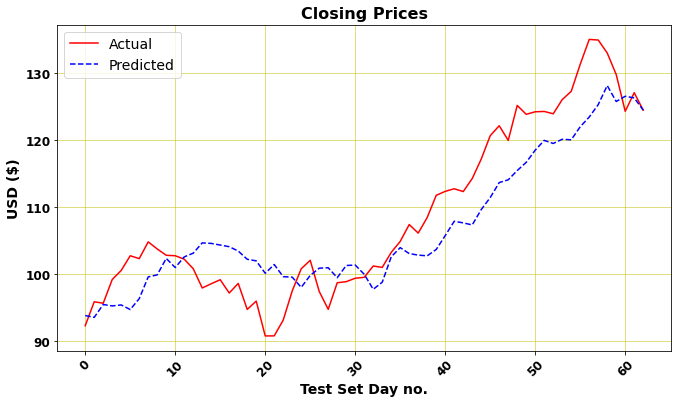

Mean Squared Error: 31.575375939283614
Mean Absolute Error: 4.809626485777839
R-squared score: 0.8041


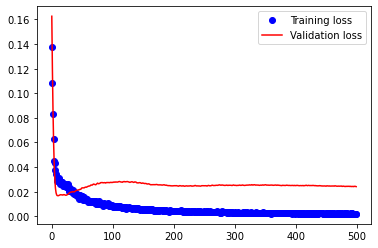

In [488]:

optimized_MSE=[]
optimized_MAE=[]
optimized_r2=[]

for i in range(10):
    
    best_parameters = optimize_parameters(model, grid, X_train_scaled, y_train_scaled)

    
    hidden_layer_one=best_parameters['hidden_layer_one']
    hidden_layer_two=best_parameters['hidden_layer_two']
    dropout=best_parameters['dropout']
    learn_rate=best_parameters['learn_rate']
    batch_size=best_parameters['batch_size']
    epochs=best_parameters['epochs']
    

    best_model = get_mlp_model(input_dim, hidden_layer_one=hidden_layer_one, hidden_layer_two=hidden_layer_two,
        dropout=dropout, learn_rate=learn_rate)
    
    print("[INFO] training model...")
    history = best_model.fit(x=X_train_scaled, y=y_train_scaled,
        validation_data=(X_valid_scaled, y_valid_scaled),
        batch_size=batch_size,
        epochs=epochs)
    
    pred_test = best_model.predict(X_test_scaled)
    pred_test_rescaled = Target_scaler.inverse_transform(pred_test)
    
    plot_comparison_graph(y_test_rescaled, pred_test_rescaled)
    
    plot_loss(history)
    

    
    measures = calculate_error_measures(y_test_rescaled, pred_test_rescaled)
    optimized_MSE.append(measures[0])
    optimized_MAE.append(measures[1])
    optimized_r2.append(measures[2])


In [500]:


print(sum(optimized_MSE)/10)
print(sum(optimized_MAE)/10)
print(sum(optimized_r2)/10)


42.1544241666048
5.335716650118583
0.7384656932104148


In [493]:
#from keras.callbacks import EarlyStopping

#earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [499]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV